In [5]:
import pandas as pd
import datetime
import requests, json

# Configuration

In [4]:
WOOJANGCHUN_DATA = '/Users/sangjinlee/Desktop/수위예측/data/우장춘 지하차도 수위센서 수위데이터(2021.5.28._2022.7.26.).xlsx'
WOOJANGCHUN_LAT = 35.21 
WOOJANGCHUN_LON = 129.07

OPENWEATHER_API_KEY = "674984e1a375f5170d34b1cd08e7ff1c"
OPENWEATHER_HISTORY_URL = "https://api.openweathermap.org/data/3.0/onecall/timemachine?"

# 날짜 데이터 생성

In [3]:
MONTH = [6, 7, 8]
date_list = []
for month in MONTH:
    DAY = 30 if month == 6 else 31
    for day in range(DAY):
        for hour in range(24):
            for minute in range(60):
                date = str(2022) + '-' + str(month) + '-' + str(day+1)
                try:
                    datetime_object = datetime.strptime(date, "%Y-%m-%d")
                    date = datetime_object.strftime("%Y-%m-%d")
                    date_list.append([date, hour, minute])
                except:
                    print(date)

df = pd.DataFrame(date_list, columns =['date', 'hour', 'minute']) 
df

,date,hour,minute
0,2022-06-01,0,0
1,2022-06-01,0,1
2,2022-06-01,0,2
3,2022-06-01,0,3
4,2022-06-01,0,4
...,...,...,...
132475,2022-08-31,23,55
132476,2022-08-31,23,56
132477,2022-08-31,23,57
132478,2022-08-31,23,58


In [8]:
year = 2021
month = 6
day = 1
hour = 0

KST = datetime.timezone(datetime.timedelta(hours=9))
start_time = int(datetime.datetime(year, month, day, hour, tzinfo=KST).timestamp())
end_time = int(datetime.datetime(year, month, day, hour+1, tzinfo=KST).timestamp())

history_complete_url = OPENWEATHER_HISTORY_URL + "lat=" + str(WOOJANGCHUN_LAT) + "&lon=" + str(WOOJANGCHUN_LON) + "&dt=" + str(start_time) + "&appid=" + OPENWEATHER_API_KEY
print(history_complete_url)
response = requests.get(history_complete_url)
x = response.json()
x['data'][0]['temp'] = round(x['data'][0]['temp'] - 273.15, 2)
x['data'][0]['feels_like'] = round(x['data'][0]['feels_like'] - 273.15, 2)
x['data'][0]['dew_point'] = round(x['data'][0]['dew_point'] - 273.15, 2)

#x['data'][0]['weather']
x
# x['data'][0]['rain']

https://api.openweathermap.org/data/3.0/onecall/timemachine?lat=35.21&lon=129.07&dt=1622473200&appid=674984e1a375f5170d34b1cd08e7ff1c


{'lat': 35.21,
 'lon': 129.07,
 'timezone': 'Asia/Seoul',
 'timezone_offset': 32400,
 'data': [{'dt': 1622473200,
   'sunrise': 1622491843,
   'sunset': 1622543559,
   'temp': 18.09,
   'feels_like': 17.63,
   'pressure': 1014,
   'humidity': 64,
   'dew_point': 11.18,
   'clouds': 0,
   'visibility': 10000,
   'wind_speed': 1.54,
   'wind_deg': 90,
   'weather': [{'id': 800,
     'main': 'Clear',
     'description': 'clear sky',
     'icon': '01n'}]}]}

In [335]:
num_days = [30,31,31]
col = ['date','hour','minute','temp','feels_like','pressure',
       'humidity','dew_point','clouds','visibility',
       'wind_speed','wind_deg','weather_main','weather_desc']
dataframe = pd.DataFrame(columns=col)

monthh = 0
for days in num_days:
    for dayy in range(days):
        for hourr in range(24):
            for minutee in range(60):
                print(hour+hourr)
                start_time = int(datetime.datetime(year, month+monthh, day+dayy, hour+hourr, minute+minutee, tzinfo=KST).timestamp())
                history_complete_url = OPENWEATHER_HISTORY_URL + "lat=" + str(WOOJANGCHUN_LAT) + "&lon=" + str(WOOJANGCHUN_LON) + "&dt=" + str(start_time) + "&appid=" + OPENWEATHER_API_KEY
                response = requests.get(history_complete_url)
                x = response.json()
                date = datetime.date(year, month, day+dayy)
                time = datetime.time(hour+hourr, minute+minutee)
                print("{} {}".format(date, time))
                data = x['data'][0]
                data['temp'] = round(data['temp'] - 273.15, 2)
                data['feels_like'] = round(data['feels_like'] - 273.15, 2)
                data['dew_point'] = round(data['dew_point'] - 273.15, 2)

                keys = ['temp','feels_like','pressure','humidity','dew_point','clouds','visibility','wind_speed','wind_deg']
                dic = dict((k, data[k]) for k in keys if k in data)

                print(dic)

                df = pd.DataFrame([dic], columns=dic.keys())
                df['minute'] = time.minute
                df['hour'] = time.hour
                df['date'] = date
                df['weather_main'] = data['weather'][0]['main']
                df['weather_desc'] = data['weather'][0]['description']

                if 'rain' in list(data.keys()):
                    for key, value in data['rain'].items():
                        df[key] = value


                dataframe = dataframe.append(df)

                print(dataframe)
                
    monthh += 1
    day, hour, minute = 1, 0, 0
    

0
2021-06-01 00:00:00
{'temp': 17.84, 'feels_like': 17.85, 'pressure': 1015, 'humidity': 83, 'dew_point': 14.92, 'clouds': 24, 'wind_speed': 2.44, 'wind_deg': 57}
         date hour minute   temp  feels_like pressure humidity  dew_point  \
0  2021-06-01    0      0  17.84       17.85     1015       83      14.92   

  clouds visibility  wind_speed wind_deg weather_main weather_desc  
0     24        NaN        2.44       57       Clouds   few clouds  
0
2021-06-01 00:01:00
{'temp': 17.84, 'feels_like': 17.85, 'pressure': 1015, 'humidity': 83, 'dew_point': 14.92, 'clouds': 24, 'wind_speed': 2.44, 'wind_deg': 57}
         date hour minute   temp  feels_like pressure humidity  dew_point  \
0  2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0  2021-06-01    0      1  17.84       17.85     1015       83      14.92   

  clouds visibility  wind_speed wind_deg weather_main weather_desc  
0     24        NaN        2.44       57       Clouds   few clouds  
0     24   

2021-06-01 00:09:00
{'temp': 17.84, 'feels_like': 17.85, 'pressure': 1015, 'humidity': 83, 'dew_point': 14.92, 'clouds': 24, 'wind_speed': 2.44, 'wind_deg': 57}
         date hour minute   temp  feels_like pressure humidity  dew_point  \
0  2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0  2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0  2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0  2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0  2021-06-01    0      4  17.84       17.85     1015       83      14.92   
0  2021-06-01    0      5  17.84       17.85     1015       83      14.92   
0  2021-06-01    0      6  17.84       17.85     1015       83      14.92   
0  2021-06-01    0      7  17.84       17.85     1015       83      14.92   
0  2021-06-01    0      8  17.84       17.85     1015       83      14.92   
0  2021-06-01    0      9  17.84       17.85     1015       83      1

2021-06-01 00:14:00
{'temp': 17.84, 'feels_like': 17.85, 'pressure': 1015, 'humidity': 83, 'dew_point': 14.92, 'clouds': 24, 'wind_speed': 2.44, 'wind_deg': 57}
         date hour minute   temp  feels_like pressure humidity  dew_point  \
0  2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0  2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0  2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0  2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0  2021-06-01    0      4  17.84       17.85     1015       83      14.92   
0  2021-06-01    0      5  17.84       17.85     1015       83      14.92   
0  2021-06-01    0      6  17.84       17.85     1015       83      14.92   
0  2021-06-01    0      7  17.84       17.85     1015       83      14.92   
0  2021-06-01    0      8  17.84       17.85     1015       83      14.92   
0  2021-06-01    0      9  17.84       17.85     1015       83      1

2021-06-01 00:18:00
{'temp': 17.84, 'feels_like': 17.85, 'pressure': 1015, 'humidity': 83, 'dew_point': 14.92, 'clouds': 24, 'wind_speed': 2.44, 'wind_deg': 57}
         date hour minute   temp  feels_like pressure humidity  dew_point  \
0  2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0  2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0  2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0  2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0  2021-06-01    0      4  17.84       17.85     1015       83      14.92   
0  2021-06-01    0      5  17.84       17.85     1015       83      14.92   
0  2021-06-01    0      6  17.84       17.85     1015       83      14.92   
0  2021-06-01    0      7  17.84       17.85     1015       83      14.92   
0  2021-06-01    0      8  17.84       17.85     1015       83      14.92   
0  2021-06-01    0      9  17.84       17.85     1015       83      1

2021-06-01 00:21:00
{'temp': 17.84, 'feels_like': 17.85, 'pressure': 1015, 'humidity': 83, 'dew_point': 14.92, 'clouds': 24, 'wind_speed': 2.44, 'wind_deg': 57}
         date hour minute   temp  feels_like pressure humidity  dew_point  \
0  2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0  2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0  2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0  2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0  2021-06-01    0      4  17.84       17.85     1015       83      14.92   
0  2021-06-01    0      5  17.84       17.85     1015       83      14.92   
0  2021-06-01    0      6  17.84       17.85     1015       83      14.92   
0  2021-06-01    0      7  17.84       17.85     1015       83      14.92   
0  2021-06-01    0      8  17.84       17.85     1015       83      14.92   
0  2021-06-01    0      9  17.84       17.85     1015       83      1

2021-06-01 00:24:00
{'temp': 17.84, 'feels_like': 17.85, 'pressure': 1015, 'humidity': 83, 'dew_point': 14.92, 'clouds': 24, 'wind_speed': 2.44, 'wind_deg': 57}
         date hour minute   temp  feels_like pressure humidity  dew_point  \
0  2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0  2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0  2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0  2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0  2021-06-01    0      4  17.84       17.85     1015       83      14.92   
0  2021-06-01    0      5  17.84       17.85     1015       83      14.92   
0  2021-06-01    0      6  17.84       17.85     1015       83      14.92   
0  2021-06-01    0      7  17.84       17.85     1015       83      14.92   
0  2021-06-01    0      8  17.84       17.85     1015       83      14.92   
0  2021-06-01    0      9  17.84       17.85     1015       83      1

2021-06-01 00:27:00
{'temp': 17.84, 'feels_like': 17.85, 'pressure': 1015, 'humidity': 83, 'dew_point': 14.92, 'clouds': 24, 'wind_speed': 2.44, 'wind_deg': 57}
         date hour minute   temp  feels_like pressure humidity  dew_point  \
0  2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0  2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0  2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0  2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0  2021-06-01    0      4  17.84       17.85     1015       83      14.92   
0  2021-06-01    0      5  17.84       17.85     1015       83      14.92   
0  2021-06-01    0      6  17.84       17.85     1015       83      14.92   
0  2021-06-01    0      7  17.84       17.85     1015       83      14.92   
0  2021-06-01    0      8  17.84       17.85     1015       83      14.92   
0  2021-06-01    0      9  17.84       17.85     1015       83      1

2021-06-01 00:29:00
{'temp': 17.84, 'feels_like': 17.85, 'pressure': 1015, 'humidity': 83, 'dew_point': 14.92, 'clouds': 24, 'wind_speed': 2.44, 'wind_deg': 57}
         date hour minute   temp  feels_like pressure humidity  dew_point  \
0  2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0  2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0  2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0  2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0  2021-06-01    0      4  17.84       17.85     1015       83      14.92   
0  2021-06-01    0      5  17.84       17.85     1015       83      14.92   
0  2021-06-01    0      6  17.84       17.85     1015       83      14.92   
0  2021-06-01    0      7  17.84       17.85     1015       83      14.92   
0  2021-06-01    0      8  17.84       17.85     1015       83      14.92   
0  2021-06-01    0      9  17.84       17.85     1015       83      1

2021-06-01 00:31:00
{'temp': 17.65, 'feels_like': 17.66, 'pressure': 1014, 'humidity': 84, 'dew_point': 14.92, 'clouds': 38, 'wind_speed': 2.22, 'wind_deg': 56}
         date hour minute   temp  feels_like pressure humidity  dew_point  \
0  2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0  2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0  2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0  2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0  2021-06-01    0      4  17.84       17.85     1015       83      14.92   
0  2021-06-01    0      5  17.84       17.85     1015       83      14.92   
0  2021-06-01    0      6  17.84       17.85     1015       83      14.92   
0  2021-06-01    0      7  17.84       17.85     1015       83      14.92   
0  2021-06-01    0      8  17.84       17.85     1015       83      14.92   
0  2021-06-01    0      9  17.84       17.85     1015       83      1

2021-06-01 00:33:00
{'temp': 17.65, 'feels_like': 17.66, 'pressure': 1014, 'humidity': 84, 'dew_point': 14.92, 'clouds': 38, 'wind_speed': 2.22, 'wind_deg': 56}
         date hour minute   temp  feels_like pressure humidity  dew_point  \
0  2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0  2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0  2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0  2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0  2021-06-01    0      4  17.84       17.85     1015       83      14.92   
0  2021-06-01    0      5  17.84       17.85     1015       83      14.92   
0  2021-06-01    0      6  17.84       17.85     1015       83      14.92   
0  2021-06-01    0      7  17.84       17.85     1015       83      14.92   
0  2021-06-01    0      8  17.84       17.85     1015       83      14.92   
0  2021-06-01    0      9  17.84       17.85     1015       83      1

2021-06-01 00:35:00
{'temp': 17.65, 'feels_like': 17.66, 'pressure': 1014, 'humidity': 84, 'dew_point': 14.92, 'clouds': 38, 'wind_speed': 2.22, 'wind_deg': 56}
         date hour minute   temp  feels_like pressure humidity  dew_point  \
0  2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0  2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0  2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0  2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0  2021-06-01    0      4  17.84       17.85     1015       83      14.92   
0  2021-06-01    0      5  17.84       17.85     1015       83      14.92   
0  2021-06-01    0      6  17.84       17.85     1015       83      14.92   
0  2021-06-01    0      7  17.84       17.85     1015       83      14.92   
0  2021-06-01    0      8  17.84       17.85     1015       83      14.92   
0  2021-06-01    0      9  17.84       17.85     1015       83      1

2021-06-01 00:37:00
{'temp': 17.65, 'feels_like': 17.66, 'pressure': 1014, 'humidity': 84, 'dew_point': 14.92, 'clouds': 38, 'wind_speed': 2.22, 'wind_deg': 56}
         date hour minute   temp  feels_like pressure humidity  dew_point  \
0  2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0  2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0  2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0  2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0  2021-06-01    0      4  17.84       17.85     1015       83      14.92   
0  2021-06-01    0      5  17.84       17.85     1015       83      14.92   
0  2021-06-01    0      6  17.84       17.85     1015       83      14.92   
0  2021-06-01    0      7  17.84       17.85     1015       83      14.92   
0  2021-06-01    0      8  17.84       17.85     1015       83      14.92   
0  2021-06-01    0      9  17.84       17.85     1015       83      1

2021-06-01 00:39:00
{'temp': 17.65, 'feels_like': 17.66, 'pressure': 1014, 'humidity': 84, 'dew_point': 14.92, 'clouds': 38, 'wind_speed': 2.22, 'wind_deg': 56}
         date hour minute   temp  feels_like pressure humidity  dew_point  \
0  2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0  2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0  2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0  2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0  2021-06-01    0      4  17.84       17.85     1015       83      14.92   
0  2021-06-01    0      5  17.84       17.85     1015       83      14.92   
0  2021-06-01    0      6  17.84       17.85     1015       83      14.92   
0  2021-06-01    0      7  17.84       17.85     1015       83      14.92   
0  2021-06-01    0      8  17.84       17.85     1015       83      14.92   
0  2021-06-01    0      9  17.84       17.85     1015       83      1

2021-06-01 00:41:00
{'temp': 17.65, 'feels_like': 17.66, 'pressure': 1014, 'humidity': 84, 'dew_point': 14.92, 'clouds': 38, 'wind_speed': 2.22, 'wind_deg': 56}
         date hour minute   temp  feels_like pressure humidity  dew_point  \
0  2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0  2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0  2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0  2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0  2021-06-01    0      4  17.84       17.85     1015       83      14.92   
0  2021-06-01    0      5  17.84       17.85     1015       83      14.92   
0  2021-06-01    0      6  17.84       17.85     1015       83      14.92   
0  2021-06-01    0      7  17.84       17.85     1015       83      14.92   
0  2021-06-01    0      8  17.84       17.85     1015       83      14.92   
0  2021-06-01    0      9  17.84       17.85     1015       83      1

2021-06-01 00:43:00
{'temp': 17.65, 'feels_like': 17.66, 'pressure': 1014, 'humidity': 84, 'dew_point': 14.92, 'clouds': 38, 'wind_speed': 2.22, 'wind_deg': 56}
         date hour minute   temp  feels_like pressure humidity  dew_point  \
0  2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0  2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0  2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0  2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0  2021-06-01    0      4  17.84       17.85     1015       83      14.92   
0  2021-06-01    0      5  17.84       17.85     1015       83      14.92   
0  2021-06-01    0      6  17.84       17.85     1015       83      14.92   
0  2021-06-01    0      7  17.84       17.85     1015       83      14.92   
0  2021-06-01    0      8  17.84       17.85     1015       83      14.92   
0  2021-06-01    0      9  17.84       17.85     1015       83      1

2021-06-01 00:45:00
{'temp': 17.65, 'feels_like': 17.66, 'pressure': 1014, 'humidity': 84, 'dew_point': 14.92, 'clouds': 38, 'wind_speed': 2.22, 'wind_deg': 56}
         date hour minute   temp  feels_like pressure humidity  dew_point  \
0  2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0  2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0  2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0  2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0  2021-06-01    0      4  17.84       17.85     1015       83      14.92   
0  2021-06-01    0      5  17.84       17.85     1015       83      14.92   
0  2021-06-01    0      6  17.84       17.85     1015       83      14.92   
0  2021-06-01    0      7  17.84       17.85     1015       83      14.92   
0  2021-06-01    0      8  17.84       17.85     1015       83      14.92   
0  2021-06-01    0      9  17.84       17.85     1015       83      1

2021-06-01 00:47:00
{'temp': 17.65, 'feels_like': 17.66, 'pressure': 1014, 'humidity': 84, 'dew_point': 14.92, 'clouds': 38, 'wind_speed': 2.22, 'wind_deg': 56}
         date hour minute   temp  feels_like pressure humidity  dew_point  \
0  2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0  2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0  2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0  2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0  2021-06-01    0      4  17.84       17.85     1015       83      14.92   
0  2021-06-01    0      5  17.84       17.85     1015       83      14.92   
0  2021-06-01    0      6  17.84       17.85     1015       83      14.92   
0  2021-06-01    0      7  17.84       17.85     1015       83      14.92   
0  2021-06-01    0      8  17.84       17.85     1015       83      14.92   
0  2021-06-01    0      9  17.84       17.85     1015       83      1

2021-06-01 00:49:00
{'temp': 17.65, 'feels_like': 17.66, 'pressure': 1014, 'humidity': 84, 'dew_point': 14.92, 'clouds': 38, 'wind_speed': 2.22, 'wind_deg': 56}
         date hour minute   temp  feels_like pressure humidity  dew_point  \
0  2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0  2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0  2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0  2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0  2021-06-01    0      4  17.84       17.85     1015       83      14.92   
0  2021-06-01    0      5  17.84       17.85     1015       83      14.92   
0  2021-06-01    0      6  17.84       17.85     1015       83      14.92   
0  2021-06-01    0      7  17.84       17.85     1015       83      14.92   
0  2021-06-01    0      8  17.84       17.85     1015       83      14.92   
0  2021-06-01    0      9  17.84       17.85     1015       83      1

2021-06-01 00:51:00
{'temp': 17.65, 'feels_like': 17.66, 'pressure': 1014, 'humidity': 84, 'dew_point': 14.92, 'clouds': 38, 'wind_speed': 2.22, 'wind_deg': 56}
         date hour minute   temp  feels_like pressure humidity  dew_point  \
0  2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0  2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0  2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0  2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0  2021-06-01    0      4  17.84       17.85     1015       83      14.92   
0  2021-06-01    0      5  17.84       17.85     1015       83      14.92   
0  2021-06-01    0      6  17.84       17.85     1015       83      14.92   
0  2021-06-01    0      7  17.84       17.85     1015       83      14.92   
0  2021-06-01    0      8  17.84       17.85     1015       83      14.92   
0  2021-06-01    0      9  17.84       17.85     1015       83      1

2021-06-01 00:53:00
{'temp': 17.65, 'feels_like': 17.66, 'pressure': 1014, 'humidity': 84, 'dew_point': 14.92, 'clouds': 38, 'wind_speed': 2.22, 'wind_deg': 56}
         date hour minute   temp  feels_like pressure humidity  dew_point  \
0  2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0  2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0  2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0  2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0  2021-06-01    0      4  17.84       17.85     1015       83      14.92   
0  2021-06-01    0      5  17.84       17.85     1015       83      14.92   
0  2021-06-01    0      6  17.84       17.85     1015       83      14.92   
0  2021-06-01    0      7  17.84       17.85     1015       83      14.92   
0  2021-06-01    0      8  17.84       17.85     1015       83      14.92   
0  2021-06-01    0      9  17.84       17.85     1015       83      1

2021-06-01 00:54:00
{'temp': 17.65, 'feels_like': 17.66, 'pressure': 1014, 'humidity': 84, 'dew_point': 14.92, 'clouds': 38, 'wind_speed': 2.22, 'wind_deg': 56}
         date hour minute   temp  feels_like pressure humidity  dew_point  \
0  2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0  2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0  2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0  2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0  2021-06-01    0      4  17.84       17.85     1015       83      14.92   
0  2021-06-01    0      5  17.84       17.85     1015       83      14.92   
0  2021-06-01    0      6  17.84       17.85     1015       83      14.92   
0  2021-06-01    0      7  17.84       17.85     1015       83      14.92   
0  2021-06-01    0      8  17.84       17.85     1015       83      14.92   
0  2021-06-01    0      9  17.84       17.85     1015       83      1

2021-06-01 00:55:00
{'temp': 17.65, 'feels_like': 17.66, 'pressure': 1014, 'humidity': 84, 'dew_point': 14.92, 'clouds': 38, 'wind_speed': 2.22, 'wind_deg': 56}
         date hour minute   temp  feels_like pressure humidity  dew_point  \
0  2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0  2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0  2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0  2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0  2021-06-01    0      4  17.84       17.85     1015       83      14.92   
0  2021-06-01    0      5  17.84       17.85     1015       83      14.92   
0  2021-06-01    0      6  17.84       17.85     1015       83      14.92   
0  2021-06-01    0      7  17.84       17.85     1015       83      14.92   
0  2021-06-01    0      8  17.84       17.85     1015       83      14.92   
0  2021-06-01    0      9  17.84       17.85     1015       83      1

2021-06-01 00:56:00
{'temp': 17.65, 'feels_like': 17.66, 'pressure': 1014, 'humidity': 84, 'dew_point': 14.92, 'clouds': 38, 'wind_speed': 2.22, 'wind_deg': 56}
         date hour minute   temp  feels_like pressure humidity  dew_point  \
0  2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0  2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0  2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0  2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0  2021-06-01    0      4  17.84       17.85     1015       83      14.92   
0  2021-06-01    0      5  17.84       17.85     1015       83      14.92   
0  2021-06-01    0      6  17.84       17.85     1015       83      14.92   
0  2021-06-01    0      7  17.84       17.85     1015       83      14.92   
0  2021-06-01    0      8  17.84       17.85     1015       83      14.92   
0  2021-06-01    0      9  17.84       17.85     1015       83      1

2021-06-01 00:57:00
{'temp': 17.65, 'feels_like': 17.66, 'pressure': 1014, 'humidity': 84, 'dew_point': 14.92, 'clouds': 38, 'wind_speed': 2.22, 'wind_deg': 56}
         date hour minute   temp  feels_like pressure humidity  dew_point  \
0  2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0  2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0  2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0  2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0  2021-06-01    0      4  17.84       17.85     1015       83      14.92   
0  2021-06-01    0      5  17.84       17.85     1015       83      14.92   
0  2021-06-01    0      6  17.84       17.85     1015       83      14.92   
0  2021-06-01    0      7  17.84       17.85     1015       83      14.92   
0  2021-06-01    0      8  17.84       17.85     1015       83      14.92   
0  2021-06-01    0      9  17.84       17.85     1015       83      1

2021-06-01 00:58:00
{'temp': 17.65, 'feels_like': 17.66, 'pressure': 1014, 'humidity': 84, 'dew_point': 14.92, 'clouds': 38, 'wind_speed': 2.22, 'wind_deg': 56}
         date hour minute   temp  feels_like pressure humidity  dew_point  \
0  2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0  2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0  2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0  2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0  2021-06-01    0      4  17.84       17.85     1015       83      14.92   
0  2021-06-01    0      5  17.84       17.85     1015       83      14.92   
0  2021-06-01    0      6  17.84       17.85     1015       83      14.92   
0  2021-06-01    0      7  17.84       17.85     1015       83      14.92   
0  2021-06-01    0      8  17.84       17.85     1015       83      14.92   
0  2021-06-01    0      9  17.84       17.85     1015       83      1

2021-06-01 00:59:00
{'temp': 17.65, 'feels_like': 17.66, 'pressure': 1014, 'humidity': 84, 'dew_point': 14.92, 'clouds': 38, 'wind_speed': 2.22, 'wind_deg': 56}
         date hour minute   temp  feels_like pressure humidity  dew_point  \
0  2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0  2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0  2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0  2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0  2021-06-01    0      4  17.84       17.85     1015       83      14.92   
0  2021-06-01    0      5  17.84       17.85     1015       83      14.92   
0  2021-06-01    0      6  17.84       17.85     1015       83      14.92   
0  2021-06-01    0      7  17.84       17.85     1015       83      14.92   
0  2021-06-01    0      8  17.84       17.85     1015       83      14.92   
0  2021-06-01    0      9  17.84       17.85     1015       83      1

2021-06-01 01:00:00
{'temp': 17.65, 'feels_like': 17.66, 'pressure': 1014, 'humidity': 84, 'dew_point': 14.92, 'clouds': 38, 'wind_speed': 2.22, 'wind_deg': 56}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01    0     56  17.65       17.66     1014       84      14.92   
0   2021-06-01    0     57  17.65       17.66     1014       84      14.92   
0   2021-06-01    0     58  17.65       17.66     1014       84      14.92   
0   2021-06-01    0     59  17.65       17.66     1014     

2021-06-01 01:05:00
{'temp': 17.65, 'feels_like': 17.66, 'pressure': 1014, 'humidity': 84, 'dew_point': 14.92, 'clouds': 38, 'wind_speed': 2.22, 'wind_deg': 56}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01    1      1  17.65       17.66     1014       84      14.92   
0   2021-06-01    1      2  17.65       17.66     1014       84      14.92   
0   2021-06-01    1      3  17.65       17.66     1014       84      14.92   
0   2021-06-01    1      4  17.65       17.66     1014     

2021-06-01 01:10:00
{'temp': 17.65, 'feels_like': 17.66, 'pressure': 1014, 'humidity': 84, 'dew_point': 14.92, 'clouds': 38, 'wind_speed': 2.22, 'wind_deg': 56}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01    1      6  17.65       17.66     1014       84      14.92   
0   2021-06-01    1      7  17.65       17.66     1014       84      14.92   
0   2021-06-01    1      8  17.65       17.66     1014       84      14.92   
0   2021-06-01    1      9  17.65       17.66     1014     

2021-06-01 01:15:00
{'temp': 17.65, 'feels_like': 17.66, 'pressure': 1014, 'humidity': 84, 'dew_point': 14.92, 'clouds': 38, 'wind_speed': 2.22, 'wind_deg': 56}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01    1     11  17.65       17.66     1014       84      14.92   
0   2021-06-01    1     12  17.65       17.66     1014       84      14.92   
0   2021-06-01    1     13  17.65       17.66     1014       84      14.92   
0   2021-06-01    1     14  17.65       17.66     1014     

2021-06-01 01:20:00
{'temp': 17.65, 'feels_like': 17.66, 'pressure': 1014, 'humidity': 84, 'dew_point': 14.92, 'clouds': 38, 'wind_speed': 2.22, 'wind_deg': 56}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01    1     16  17.65       17.66     1014       84      14.92   
0   2021-06-01    1     17  17.65       17.66     1014       84      14.92   
0   2021-06-01    1     18  17.65       17.66     1014       84      14.92   
0   2021-06-01    1     19  17.65       17.66     1014     

2021-06-01 01:25:00
{'temp': 17.65, 'feels_like': 17.66, 'pressure': 1014, 'humidity': 84, 'dew_point': 14.92, 'clouds': 38, 'wind_speed': 2.22, 'wind_deg': 56}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01    1     21  17.65       17.66     1014       84      14.92   
0   2021-06-01    1     22  17.65       17.66     1014       84      14.92   
0   2021-06-01    1     23  17.65       17.66     1014       84      14.92   
0   2021-06-01    1     24  17.65       17.66     1014     

2021-06-01 01:30:00
{'temp': 16.09, 'feels_like': 16.05, 'pressure': 1014, 'humidity': 88, 'dew_point': 14.1, 'clouds': 19, 'wind_speed': 1.87, 'wind_deg': 50}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01    1     26  17.65       17.66     1014       84      14.92   
0   2021-06-01    1     27  17.65       17.66     1014       84      14.92   
0   2021-06-01    1     28  17.65       17.66     1014       84      14.92   
0   2021-06-01    1     29  17.65       17.66     1014      

2021-06-01 01:35:00
{'temp': 16.09, 'feels_like': 16.05, 'pressure': 1014, 'humidity': 88, 'dew_point': 14.1, 'clouds': 19, 'wind_speed': 1.87, 'wind_deg': 50}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01    1     31  16.09       16.05     1014       88      14.10   
0   2021-06-01    1     32  16.09       16.05     1014       88      14.10   
0   2021-06-01    1     33  16.09       16.05     1014       88      14.10   
0   2021-06-01    1     34  16.09       16.05     1014      

2021-06-01 01:40:00
{'temp': 16.09, 'feels_like': 16.05, 'pressure': 1014, 'humidity': 88, 'dew_point': 14.1, 'clouds': 19, 'wind_speed': 1.87, 'wind_deg': 50}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01    1     36  16.09       16.05     1014       88      14.10   
0   2021-06-01    1     37  16.09       16.05     1014       88      14.10   
0   2021-06-01    1     38  16.09       16.05     1014       88      14.10   
0   2021-06-01    1     39  16.09       16.05     1014      

2021-06-01 01:45:00
{'temp': 16.09, 'feels_like': 16.05, 'pressure': 1014, 'humidity': 88, 'dew_point': 14.1, 'clouds': 19, 'wind_speed': 1.87, 'wind_deg': 50}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01    1     41  16.09       16.05     1014       88      14.10   
0   2021-06-01    1     42  16.09       16.05     1014       88      14.10   
0   2021-06-01    1     43  16.09       16.05     1014       88      14.10   
0   2021-06-01    1     44  16.09       16.05     1014      

2021-06-01 01:50:00
{'temp': 16.09, 'feels_like': 16.05, 'pressure': 1014, 'humidity': 88, 'dew_point': 14.1, 'clouds': 19, 'wind_speed': 1.87, 'wind_deg': 50}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01    1     46  16.09       16.05     1014       88      14.10   
0   2021-06-01    1     47  16.09       16.05     1014       88      14.10   
0   2021-06-01    1     48  16.09       16.05     1014       88      14.10   
0   2021-06-01    1     49  16.09       16.05     1014      

2021-06-01 01:55:00
{'temp': 16.09, 'feels_like': 16.05, 'pressure': 1014, 'humidity': 88, 'dew_point': 14.1, 'clouds': 19, 'wind_speed': 1.87, 'wind_deg': 50}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01    1     51  16.09       16.05     1014       88      14.10   
0   2021-06-01    1     52  16.09       16.05     1014       88      14.10   
0   2021-06-01    1     53  16.09       16.05     1014       88      14.10   
0   2021-06-01    1     54  16.09       16.05     1014      

2021-06-01 02:00:00
{'temp': 16.09, 'feels_like': 16.05, 'pressure': 1014, 'humidity': 88, 'dew_point': 14.1, 'clouds': 19, 'wind_speed': 1.87, 'wind_deg': 50}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01    1     56  16.09       16.05     1014       88      14.10   
0   2021-06-01    1     57  16.09       16.05     1014       88      14.10   
0   2021-06-01    1     58  16.09       16.05     1014       88      14.10   
0   2021-06-01    1     59  16.09       16.05     1014      

2021-06-01 02:05:00
{'temp': 16.09, 'feels_like': 16.05, 'pressure': 1014, 'humidity': 88, 'dew_point': 14.1, 'clouds': 19, 'wind_speed': 1.87, 'wind_deg': 50}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01    2      1  16.09       16.05     1014       88      14.10   
0   2021-06-01    2      2  16.09       16.05     1014       88      14.10   
0   2021-06-01    2      3  16.09       16.05     1014       88      14.10   
0   2021-06-01    2      4  16.09       16.05     1014      

2021-06-01 02:10:00
{'temp': 16.09, 'feels_like': 16.05, 'pressure': 1014, 'humidity': 88, 'dew_point': 14.1, 'clouds': 19, 'wind_speed': 1.87, 'wind_deg': 50}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01    2      6  16.09       16.05     1014       88      14.10   
0   2021-06-01    2      7  16.09       16.05     1014       88      14.10   
0   2021-06-01    2      8  16.09       16.05     1014       88      14.10   
0   2021-06-01    2      9  16.09       16.05     1014      

2021-06-01 02:15:00
{'temp': 16.09, 'feels_like': 16.05, 'pressure': 1014, 'humidity': 88, 'dew_point': 14.1, 'clouds': 19, 'wind_speed': 1.87, 'wind_deg': 50}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01    2     11  16.09       16.05     1014       88      14.10   
0   2021-06-01    2     12  16.09       16.05     1014       88      14.10   
0   2021-06-01    2     13  16.09       16.05     1014       88      14.10   
0   2021-06-01    2     14  16.09       16.05     1014      

2021-06-01 02:20:00
{'temp': 16.09, 'feels_like': 16.05, 'pressure': 1014, 'humidity': 88, 'dew_point': 14.1, 'clouds': 19, 'wind_speed': 1.87, 'wind_deg': 50}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01    2     16  16.09       16.05     1014       88      14.10   
0   2021-06-01    2     17  16.09       16.05     1014       88      14.10   
0   2021-06-01    2     18  16.09       16.05     1014       88      14.10   
0   2021-06-01    2     19  16.09       16.05     1014      

2021-06-01 02:25:00
{'temp': 16.09, 'feels_like': 16.05, 'pressure': 1014, 'humidity': 88, 'dew_point': 14.1, 'clouds': 19, 'wind_speed': 1.87, 'wind_deg': 50}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01    2     21  16.09       16.05     1014       88      14.10   
0   2021-06-01    2     22  16.09       16.05     1014       88      14.10   
0   2021-06-01    2     23  16.09       16.05     1014       88      14.10   
0   2021-06-01    2     24  16.09       16.05     1014      

2021-06-01 02:30:00
{'temp': 15.76, 'feels_like': 15.72, 'pressure': 1014, 'humidity': 89, 'dew_point': 13.95, 'clouds': 33, 'wind_speed': 1.77, 'wind_deg': 34}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01    2     26  16.09       16.05     1014       88      14.10   
0   2021-06-01    2     27  16.09       16.05     1014       88      14.10   
0   2021-06-01    2     28  16.09       16.05     1014       88      14.10   
0   2021-06-01    2     29  16.09       16.05     1014     

2021-06-01 02:35:00
{'temp': 15.76, 'feels_like': 15.72, 'pressure': 1014, 'humidity': 89, 'dew_point': 13.95, 'clouds': 33, 'wind_speed': 1.77, 'wind_deg': 34}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01    2     31  15.76       15.72     1014       89      13.95   
0   2021-06-01    2     32  15.76       15.72     1014       89      13.95   
0   2021-06-01    2     33  15.76       15.72     1014       89      13.95   
0   2021-06-01    2     34  15.76       15.72     1014     

2021-06-01 02:40:00
{'temp': 15.76, 'feels_like': 15.72, 'pressure': 1014, 'humidity': 89, 'dew_point': 13.95, 'clouds': 33, 'wind_speed': 1.77, 'wind_deg': 34}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01    2     36  15.76       15.72     1014       89      13.95   
0   2021-06-01    2     37  15.76       15.72     1014       89      13.95   
0   2021-06-01    2     38  15.76       15.72     1014       89      13.95   
0   2021-06-01    2     39  15.76       15.72     1014     

2021-06-01 02:45:00
{'temp': 15.76, 'feels_like': 15.72, 'pressure': 1014, 'humidity': 89, 'dew_point': 13.95, 'clouds': 33, 'wind_speed': 1.77, 'wind_deg': 34}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01    2     41  15.76       15.72     1014       89      13.95   
0   2021-06-01    2     42  15.76       15.72     1014       89      13.95   
0   2021-06-01    2     43  15.76       15.72     1014       89      13.95   
0   2021-06-01    2     44  15.76       15.72     1014     

2021-06-01 02:50:00
{'temp': 15.76, 'feels_like': 15.72, 'pressure': 1014, 'humidity': 89, 'dew_point': 13.95, 'clouds': 33, 'wind_speed': 1.77, 'wind_deg': 34}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01    2     46  15.76       15.72     1014       89      13.95   
0   2021-06-01    2     47  15.76       15.72     1014       89      13.95   
0   2021-06-01    2     48  15.76       15.72     1014       89      13.95   
0   2021-06-01    2     49  15.76       15.72     1014     

2021-06-01 02:55:00
{'temp': 15.76, 'feels_like': 15.72, 'pressure': 1014, 'humidity': 89, 'dew_point': 13.95, 'clouds': 33, 'wind_speed': 1.77, 'wind_deg': 34}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01    2     51  15.76       15.72     1014       89      13.95   
0   2021-06-01    2     52  15.76       15.72     1014       89      13.95   
0   2021-06-01    2     53  15.76       15.72     1014       89      13.95   
0   2021-06-01    2     54  15.76       15.72     1014     

2021-06-01 03:00:00
{'temp': 15.76, 'feels_like': 15.72, 'pressure': 1014, 'humidity': 89, 'dew_point': 13.95, 'clouds': 33, 'wind_speed': 1.77, 'wind_deg': 34}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01    2     56  15.76       15.72     1014       89      13.95   
0   2021-06-01    2     57  15.76       15.72     1014       89      13.95   
0   2021-06-01    2     58  15.76       15.72     1014       89      13.95   
0   2021-06-01    2     59  15.76       15.72     1014     

2021-06-01 03:05:00
{'temp': 15.76, 'feels_like': 15.72, 'pressure': 1014, 'humidity': 89, 'dew_point': 13.95, 'clouds': 33, 'wind_speed': 1.77, 'wind_deg': 34}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01    3      1  15.76       15.72     1014       89      13.95   
0   2021-06-01    3      2  15.76       15.72     1014       89      13.95   
0   2021-06-01    3      3  15.76       15.72     1014       89      13.95   
0   2021-06-01    3      4  15.76       15.72     1014     

2021-06-01 03:10:00
{'temp': 15.76, 'feels_like': 15.72, 'pressure': 1014, 'humidity': 89, 'dew_point': 13.95, 'clouds': 33, 'wind_speed': 1.77, 'wind_deg': 34}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01    3      6  15.76       15.72     1014       89      13.95   
0   2021-06-01    3      7  15.76       15.72     1014       89      13.95   
0   2021-06-01    3      8  15.76       15.72     1014       89      13.95   
0   2021-06-01    3      9  15.76       15.72     1014     

2021-06-01 03:15:00
{'temp': 15.76, 'feels_like': 15.72, 'pressure': 1014, 'humidity': 89, 'dew_point': 13.95, 'clouds': 33, 'wind_speed': 1.77, 'wind_deg': 34}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01    3     11  15.76       15.72     1014       89      13.95   
0   2021-06-01    3     12  15.76       15.72     1014       89      13.95   
0   2021-06-01    3     13  15.76       15.72     1014       89      13.95   
0   2021-06-01    3     14  15.76       15.72     1014     

2021-06-01 03:20:00
{'temp': 15.76, 'feels_like': 15.72, 'pressure': 1014, 'humidity': 89, 'dew_point': 13.95, 'clouds': 33, 'wind_speed': 1.77, 'wind_deg': 34}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01    3     16  15.76       15.72     1014       89      13.95   
0   2021-06-01    3     17  15.76       15.72     1014       89      13.95   
0   2021-06-01    3     18  15.76       15.72     1014       89      13.95   
0   2021-06-01    3     19  15.76       15.72     1014     

2021-06-01 03:25:00
{'temp': 15.76, 'feels_like': 15.72, 'pressure': 1014, 'humidity': 89, 'dew_point': 13.95, 'clouds': 33, 'wind_speed': 1.77, 'wind_deg': 34}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01    3     21  15.76       15.72     1014       89      13.95   
0   2021-06-01    3     22  15.76       15.72     1014       89      13.95   
0   2021-06-01    3     23  15.76       15.72     1014       89      13.95   
0   2021-06-01    3     24  15.76       15.72     1014     

2021-06-01 03:30:00
{'temp': 15.85, 'feels_like': 15.81, 'pressure': 1015, 'humidity': 89, 'dew_point': 14.04, 'clouds': 78, 'wind_speed': 1.84, 'wind_deg': 29}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01    3     26  15.76       15.72     1014       89      13.95   
0   2021-06-01    3     27  15.76       15.72     1014       89      13.95   
0   2021-06-01    3     28  15.76       15.72     1014       89      13.95   
0   2021-06-01    3     29  15.76       15.72     1014     

2021-06-01 03:35:00
{'temp': 15.85, 'feels_like': 15.81, 'pressure': 1015, 'humidity': 89, 'dew_point': 14.04, 'clouds': 78, 'wind_speed': 1.84, 'wind_deg': 29}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01    3     31  15.85       15.81     1015       89      14.04   
0   2021-06-01    3     32  15.85       15.81     1015       89      14.04   
0   2021-06-01    3     33  15.85       15.81     1015       89      14.04   
0   2021-06-01    3     34  15.85       15.81     1015     

2021-06-01 03:40:00
{'temp': 15.85, 'feels_like': 15.81, 'pressure': 1015, 'humidity': 89, 'dew_point': 14.04, 'clouds': 78, 'wind_speed': 1.84, 'wind_deg': 29}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01    3     36  15.85       15.81     1015       89      14.04   
0   2021-06-01    3     37  15.85       15.81     1015       89      14.04   
0   2021-06-01    3     38  15.85       15.81     1015       89      14.04   
0   2021-06-01    3     39  15.85       15.81     1015     

2021-06-01 03:45:00
{'temp': 15.85, 'feels_like': 15.81, 'pressure': 1015, 'humidity': 89, 'dew_point': 14.04, 'clouds': 78, 'wind_speed': 1.84, 'wind_deg': 29}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01    3     41  15.85       15.81     1015       89      14.04   
0   2021-06-01    3     42  15.85       15.81     1015       89      14.04   
0   2021-06-01    3     43  15.85       15.81     1015       89      14.04   
0   2021-06-01    3     44  15.85       15.81     1015     

2021-06-01 03:50:00
{'temp': 15.85, 'feels_like': 15.81, 'pressure': 1015, 'humidity': 89, 'dew_point': 14.04, 'clouds': 78, 'wind_speed': 1.84, 'wind_deg': 29}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01    3     46  15.85       15.81     1015       89      14.04   
0   2021-06-01    3     47  15.85       15.81     1015       89      14.04   
0   2021-06-01    3     48  15.85       15.81     1015       89      14.04   
0   2021-06-01    3     49  15.85       15.81     1015     

2021-06-01 03:55:00
{'temp': 15.85, 'feels_like': 15.81, 'pressure': 1015, 'humidity': 89, 'dew_point': 14.04, 'clouds': 78, 'wind_speed': 1.84, 'wind_deg': 29}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01    3     51  15.85       15.81     1015       89      14.04   
0   2021-06-01    3     52  15.85       15.81     1015       89      14.04   
0   2021-06-01    3     53  15.85       15.81     1015       89      14.04   
0   2021-06-01    3     54  15.85       15.81     1015     

2021-06-01 04:00:00
{'temp': 15.85, 'feels_like': 15.81, 'pressure': 1015, 'humidity': 89, 'dew_point': 14.04, 'clouds': 78, 'wind_speed': 1.84, 'wind_deg': 29}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01    3     56  15.85       15.81     1015       89      14.04   
0   2021-06-01    3     57  15.85       15.81     1015       89      14.04   
0   2021-06-01    3     58  15.85       15.81     1015       89      14.04   
0   2021-06-01    3     59  15.85       15.81     1015     

2021-06-01 04:05:00
{'temp': 15.85, 'feels_like': 15.81, 'pressure': 1015, 'humidity': 89, 'dew_point': 14.04, 'clouds': 78, 'wind_speed': 1.84, 'wind_deg': 29}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01    4      1  15.85       15.81     1015       89      14.04   
0   2021-06-01    4      2  15.85       15.81     1015       89      14.04   
0   2021-06-01    4      3  15.85       15.81     1015       89      14.04   
0   2021-06-01    4      4  15.85       15.81     1015     

2021-06-01 04:10:00
{'temp': 15.85, 'feels_like': 15.81, 'pressure': 1015, 'humidity': 89, 'dew_point': 14.04, 'clouds': 78, 'wind_speed': 1.84, 'wind_deg': 29}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01    4      6  15.85       15.81     1015       89      14.04   
0   2021-06-01    4      7  15.85       15.81     1015       89      14.04   
0   2021-06-01    4      8  15.85       15.81     1015       89      14.04   
0   2021-06-01    4      9  15.85       15.81     1015     

2021-06-01 04:15:00
{'temp': 15.85, 'feels_like': 15.81, 'pressure': 1015, 'humidity': 89, 'dew_point': 14.04, 'clouds': 78, 'wind_speed': 1.84, 'wind_deg': 29}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01    4     11  15.85       15.81     1015       89      14.04   
0   2021-06-01    4     12  15.85       15.81     1015       89      14.04   
0   2021-06-01    4     13  15.85       15.81     1015       89      14.04   
0   2021-06-01    4     14  15.85       15.81     1015     

2021-06-01 04:20:00
{'temp': 15.85, 'feels_like': 15.81, 'pressure': 1015, 'humidity': 89, 'dew_point': 14.04, 'clouds': 78, 'wind_speed': 1.84, 'wind_deg': 29}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01    4     16  15.85       15.81     1015       89      14.04   
0   2021-06-01    4     17  15.85       15.81     1015       89      14.04   
0   2021-06-01    4     18  15.85       15.81     1015       89      14.04   
0   2021-06-01    4     19  15.85       15.81     1015     

2021-06-01 04:25:00
{'temp': 15.85, 'feels_like': 15.81, 'pressure': 1015, 'humidity': 89, 'dew_point': 14.04, 'clouds': 78, 'wind_speed': 1.84, 'wind_deg': 29}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01    4     21  15.85       15.81     1015       89      14.04   
0   2021-06-01    4     22  15.85       15.81     1015       89      14.04   
0   2021-06-01    4     23  15.85       15.81     1015       89      14.04   
0   2021-06-01    4     24  15.85       15.81     1015     

2021-06-01 04:30:00
{'temp': 15.19, 'feels_like': 15.17, 'pressure': 1015, 'humidity': 92, 'dew_point': 13.9, 'clouds': 86, 'wind_speed': 1.8, 'wind_deg': 31}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01    4     26  15.85       15.81     1015       89      14.04   
0   2021-06-01    4     27  15.85       15.81     1015       89      14.04   
0   2021-06-01    4     28  15.85       15.81     1015       89      14.04   
0   2021-06-01    4     29  15.85       15.81     1015       

2021-06-01 04:35:00
{'temp': 15.19, 'feels_like': 15.17, 'pressure': 1015, 'humidity': 92, 'dew_point': 13.9, 'clouds': 86, 'wind_speed': 1.8, 'wind_deg': 31}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01    4     31  15.19       15.17     1015       92      13.90   
0   2021-06-01    4     32  15.19       15.17     1015       92      13.90   
0   2021-06-01    4     33  15.19       15.17     1015       92      13.90   
0   2021-06-01    4     34  15.19       15.17     1015       

2021-06-01 04:40:00
{'temp': 15.19, 'feels_like': 15.17, 'pressure': 1015, 'humidity': 92, 'dew_point': 13.9, 'clouds': 86, 'wind_speed': 1.8, 'wind_deg': 31}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01    4     36  15.19       15.17     1015       92      13.90   
0   2021-06-01    4     37  15.19       15.17     1015       92      13.90   
0   2021-06-01    4     38  15.19       15.17     1015       92      13.90   
0   2021-06-01    4     39  15.19       15.17     1015       

2021-06-01 04:45:00
{'temp': 15.19, 'feels_like': 15.17, 'pressure': 1015, 'humidity': 92, 'dew_point': 13.9, 'clouds': 86, 'wind_speed': 1.8, 'wind_deg': 31}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01    4     41  15.19       15.17     1015       92      13.90   
0   2021-06-01    4     42  15.19       15.17     1015       92      13.90   
0   2021-06-01    4     43  15.19       15.17     1015       92      13.90   
0   2021-06-01    4     44  15.19       15.17     1015       

2021-06-01 04:50:00
{'temp': 15.19, 'feels_like': 15.17, 'pressure': 1015, 'humidity': 92, 'dew_point': 13.9, 'clouds': 86, 'wind_speed': 1.8, 'wind_deg': 31}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01    4     46  15.19       15.17     1015       92      13.90   
0   2021-06-01    4     47  15.19       15.17     1015       92      13.90   
0   2021-06-01    4     48  15.19       15.17     1015       92      13.90   
0   2021-06-01    4     49  15.19       15.17     1015       

2021-06-01 04:55:00
{'temp': 15.19, 'feels_like': 15.17, 'pressure': 1015, 'humidity': 92, 'dew_point': 13.9, 'clouds': 86, 'wind_speed': 1.8, 'wind_deg': 31}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01    4     51  15.19       15.17     1015       92      13.90   
0   2021-06-01    4     52  15.19       15.17     1015       92      13.90   
0   2021-06-01    4     53  15.19       15.17     1015       92      13.90   
0   2021-06-01    4     54  15.19       15.17     1015       

2021-06-01 05:00:00
{'temp': 15.19, 'feels_like': 15.17, 'pressure': 1015, 'humidity': 92, 'dew_point': 13.9, 'clouds': 86, 'wind_speed': 1.8, 'wind_deg': 31}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01    4     56  15.19       15.17     1015       92      13.90   
0   2021-06-01    4     57  15.19       15.17     1015       92      13.90   
0   2021-06-01    4     58  15.19       15.17     1015       92      13.90   
0   2021-06-01    4     59  15.19       15.17     1015       

2021-06-01 05:05:00
{'temp': 15.19, 'feels_like': 15.17, 'pressure': 1015, 'humidity': 92, 'dew_point': 13.9, 'clouds': 86, 'wind_speed': 1.8, 'wind_deg': 31}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01    5      1  15.19       15.17     1015       92      13.90   
0   2021-06-01    5      2  15.19       15.17     1015       92      13.90   
0   2021-06-01    5      3  15.19       15.17     1015       92      13.90   
0   2021-06-01    5      4  15.19       15.17     1015       

2021-06-01 05:10:00
{'temp': 15.19, 'feels_like': 15.17, 'pressure': 1015, 'humidity': 92, 'dew_point': 13.9, 'clouds': 86, 'wind_speed': 1.8, 'wind_deg': 31}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01    5      6  15.19       15.17     1015       92      13.90   
0   2021-06-01    5      7  15.19       15.17     1015       92      13.90   
0   2021-06-01    5      8  15.19       15.17     1015       92      13.90   
0   2021-06-01    5      9  15.19       15.17     1015       

2021-06-01 05:15:00
{'temp': 15.19, 'feels_like': 15.17, 'pressure': 1015, 'humidity': 92, 'dew_point': 13.9, 'clouds': 86, 'wind_speed': 1.8, 'wind_deg': 31}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01    5     11  15.19       15.17     1015       92      13.90   
0   2021-06-01    5     12  15.19       15.17     1015       92      13.90   
0   2021-06-01    5     13  15.19       15.17     1015       92      13.90   
0   2021-06-01    5     14  15.19       15.17     1015       

2021-06-01 05:20:00
{'temp': 15.19, 'feels_like': 15.17, 'pressure': 1015, 'humidity': 92, 'dew_point': 13.9, 'clouds': 86, 'wind_speed': 1.8, 'wind_deg': 31}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01    5     16  15.19       15.17     1015       92      13.90   
0   2021-06-01    5     17  15.19       15.17     1015       92      13.90   
0   2021-06-01    5     18  15.19       15.17     1015       92      13.90   
0   2021-06-01    5     19  15.19       15.17     1015       

2021-06-01 05:25:00
{'temp': 15.19, 'feels_like': 15.17, 'pressure': 1015, 'humidity': 92, 'dew_point': 13.9, 'clouds': 86, 'wind_speed': 1.8, 'wind_deg': 31}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01    5     21  15.19       15.17     1015       92      13.90   
0   2021-06-01    5     22  15.19       15.17     1015       92      13.90   
0   2021-06-01    5     23  15.19       15.17     1015       92      13.90   
0   2021-06-01    5     24  15.19       15.17     1015       

2021-06-01 05:30:00
{'temp': 14.94, 'feels_like': 14.89, 'pressure': 1015, 'humidity': 92, 'dew_point': 13.65, 'clouds': 64, 'wind_speed': 1.99, 'wind_deg': 29}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01    5     26  15.19       15.17     1015       92      13.90   
0   2021-06-01    5     27  15.19       15.17     1015       92      13.90   
0   2021-06-01    5     28  15.19       15.17     1015       92      13.90   
0   2021-06-01    5     29  15.19       15.17     1015     

2021-06-01 05:35:00
{'temp': 14.94, 'feels_like': 14.89, 'pressure': 1015, 'humidity': 92, 'dew_point': 13.65, 'clouds': 64, 'wind_speed': 1.99, 'wind_deg': 29}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01    5     31  14.94       14.89     1015       92      13.65   
0   2021-06-01    5     32  14.94       14.89     1015       92      13.65   
0   2021-06-01    5     33  14.94       14.89     1015       92      13.65   
0   2021-06-01    5     34  14.94       14.89     1015     

2021-06-01 05:40:00
{'temp': 14.94, 'feels_like': 14.89, 'pressure': 1015, 'humidity': 92, 'dew_point': 13.65, 'clouds': 64, 'wind_speed': 1.99, 'wind_deg': 29}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01    5     36  14.94       14.89     1015       92      13.65   
0   2021-06-01    5     37  14.94       14.89     1015       92      13.65   
0   2021-06-01    5     38  14.94       14.89     1015       92      13.65   
0   2021-06-01    5     39  14.94       14.89     1015     

2021-06-01 05:45:00
{'temp': 14.94, 'feels_like': 14.89, 'pressure': 1015, 'humidity': 92, 'dew_point': 13.65, 'clouds': 64, 'wind_speed': 1.99, 'wind_deg': 29}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01    5     41  14.94       14.89     1015       92      13.65   
0   2021-06-01    5     42  14.94       14.89     1015       92      13.65   
0   2021-06-01    5     43  14.94       14.89     1015       92      13.65   
0   2021-06-01    5     44  14.94       14.89     1015     

2021-06-01 05:50:00
{'temp': 14.94, 'feels_like': 14.89, 'pressure': 1015, 'humidity': 92, 'dew_point': 13.65, 'clouds': 64, 'wind_speed': 1.99, 'wind_deg': 29}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01    5     46  14.94       14.89     1015       92      13.65   
0   2021-06-01    5     47  14.94       14.89     1015       92      13.65   
0   2021-06-01    5     48  14.94       14.89     1015       92      13.65   
0   2021-06-01    5     49  14.94       14.89     1015     

2021-06-01 05:55:00
{'temp': 14.94, 'feels_like': 14.89, 'pressure': 1015, 'humidity': 92, 'dew_point': 13.65, 'clouds': 64, 'wind_speed': 1.99, 'wind_deg': 29}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01    5     51  14.94       14.89     1015       92      13.65   
0   2021-06-01    5     52  14.94       14.89     1015       92      13.65   
0   2021-06-01    5     53  14.94       14.89     1015       92      13.65   
0   2021-06-01    5     54  14.94       14.89     1015     

2021-06-01 06:00:00
{'temp': 14.94, 'feels_like': 14.89, 'pressure': 1015, 'humidity': 92, 'dew_point': 13.65, 'clouds': 64, 'wind_speed': 1.99, 'wind_deg': 29}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01    5     56  14.94       14.89     1015       92      13.65   
0   2021-06-01    5     57  14.94       14.89     1015       92      13.65   
0   2021-06-01    5     58  14.94       14.89     1015       92      13.65   
0   2021-06-01    5     59  14.94       14.89     1015     

2021-06-01 06:05:00
{'temp': 14.94, 'feels_like': 14.89, 'pressure': 1015, 'humidity': 92, 'dew_point': 13.65, 'clouds': 64, 'wind_speed': 1.99, 'wind_deg': 29}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01    6      1  14.94       14.89     1015       92      13.65   
0   2021-06-01    6      2  14.94       14.89     1015       92      13.65   
0   2021-06-01    6      3  14.94       14.89     1015       92      13.65   
0   2021-06-01    6      4  14.94       14.89     1015     

2021-06-01 06:10:00
{'temp': 14.94, 'feels_like': 14.89, 'pressure': 1015, 'humidity': 92, 'dew_point': 13.65, 'clouds': 64, 'wind_speed': 1.99, 'wind_deg': 29}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01    6      6  14.94       14.89     1015       92      13.65   
0   2021-06-01    6      7  14.94       14.89     1015       92      13.65   
0   2021-06-01    6      8  14.94       14.89     1015       92      13.65   
0   2021-06-01    6      9  14.94       14.89     1015     

2021-06-01 06:15:00
{'temp': 14.94, 'feels_like': 14.89, 'pressure': 1015, 'humidity': 92, 'dew_point': 13.65, 'clouds': 64, 'wind_speed': 1.99, 'wind_deg': 29}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01    6     11  14.94       14.89     1015       92      13.65   
0   2021-06-01    6     12  14.94       14.89     1015       92      13.65   
0   2021-06-01    6     13  14.94       14.89     1015       92      13.65   
0   2021-06-01    6     14  14.94       14.89     1015     

2021-06-01 06:20:00
{'temp': 14.94, 'feels_like': 14.89, 'pressure': 1015, 'humidity': 92, 'dew_point': 13.65, 'clouds': 64, 'wind_speed': 1.99, 'wind_deg': 29}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01    6     16  14.94       14.89     1015       92      13.65   
0   2021-06-01    6     17  14.94       14.89     1015       92      13.65   
0   2021-06-01    6     18  14.94       14.89     1015       92      13.65   
0   2021-06-01    6     19  14.94       14.89     1015     

2021-06-01 06:25:00
{'temp': 14.94, 'feels_like': 14.89, 'pressure': 1015, 'humidity': 92, 'dew_point': 13.65, 'clouds': 64, 'wind_speed': 1.99, 'wind_deg': 29}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01    6     21  14.94       14.89     1015       92      13.65   
0   2021-06-01    6     22  14.94       14.89     1015       92      13.65   
0   2021-06-01    6     23  14.94       14.89     1015       92      13.65   
0   2021-06-01    6     24  14.94       14.89     1015     

2021-06-01 06:30:00
{'temp': 18.71, 'feels_like': 18.8, 'pressure': 1016, 'humidity': 83, 'dew_point': 15.77, 'clouds': 8, 'wind_speed': 1.49, 'wind_deg': 10}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01    6     26  14.94       14.89     1015       92      13.65   
0   2021-06-01    6     27  14.94       14.89     1015       92      13.65   
0   2021-06-01    6     28  14.94       14.89     1015       92      13.65   
0   2021-06-01    6     29  14.94       14.89     1015       

2021-06-01 06:35:00
{'temp': 18.71, 'feels_like': 18.8, 'pressure': 1016, 'humidity': 83, 'dew_point': 15.77, 'clouds': 8, 'wind_speed': 1.49, 'wind_deg': 10}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01    6     31  18.71       18.80     1016       83      15.77   
0   2021-06-01    6     32  18.71       18.80     1016       83      15.77   
0   2021-06-01    6     33  18.71       18.80     1016       83      15.77   
0   2021-06-01    6     34  18.71       18.80     1016       

2021-06-01 06:40:00
{'temp': 18.71, 'feels_like': 18.8, 'pressure': 1016, 'humidity': 83, 'dew_point': 15.77, 'clouds': 8, 'wind_speed': 1.49, 'wind_deg': 10}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01    6     36  18.71       18.80     1016       83      15.77   
0   2021-06-01    6     37  18.71       18.80     1016       83      15.77   
0   2021-06-01    6     38  18.71       18.80     1016       83      15.77   
0   2021-06-01    6     39  18.71       18.80     1016       

2021-06-01 06:45:00
{'temp': 18.71, 'feels_like': 18.8, 'pressure': 1016, 'humidity': 83, 'dew_point': 15.77, 'clouds': 8, 'wind_speed': 1.49, 'wind_deg': 10}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01    6     41  18.71       18.80     1016       83      15.77   
0   2021-06-01    6     42  18.71       18.80     1016       83      15.77   
0   2021-06-01    6     43  18.71       18.80     1016       83      15.77   
0   2021-06-01    6     44  18.71       18.80     1016       

2021-06-01 06:50:00
{'temp': 18.71, 'feels_like': 18.8, 'pressure': 1016, 'humidity': 83, 'dew_point': 15.77, 'clouds': 8, 'wind_speed': 1.49, 'wind_deg': 10}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01    6     46  18.71       18.80     1016       83      15.77   
0   2021-06-01    6     47  18.71       18.80     1016       83      15.77   
0   2021-06-01    6     48  18.71       18.80     1016       83      15.77   
0   2021-06-01    6     49  18.71       18.80     1016       

2021-06-01 06:55:00
{'temp': 18.71, 'feels_like': 18.8, 'pressure': 1016, 'humidity': 83, 'dew_point': 15.77, 'clouds': 8, 'wind_speed': 1.49, 'wind_deg': 10}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01    6     51  18.71       18.80     1016       83      15.77   
0   2021-06-01    6     52  18.71       18.80     1016       83      15.77   
0   2021-06-01    6     53  18.71       18.80     1016       83      15.77   
0   2021-06-01    6     54  18.71       18.80     1016       

2021-06-01 07:00:00
{'temp': 18.71, 'feels_like': 18.8, 'pressure': 1016, 'humidity': 83, 'dew_point': 15.77, 'clouds': 8, 'wind_speed': 1.49, 'wind_deg': 10}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01    6     56  18.71       18.80     1016       83      15.77   
0   2021-06-01    6     57  18.71       18.80     1016       83      15.77   
0   2021-06-01    6     58  18.71       18.80     1016       83      15.77   
0   2021-06-01    6     59  18.71       18.80     1016       

2021-06-01 07:05:00
{'temp': 18.71, 'feels_like': 18.8, 'pressure': 1016, 'humidity': 83, 'dew_point': 15.77, 'clouds': 8, 'wind_speed': 1.49, 'wind_deg': 10}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01    7      1  18.71       18.80     1016       83      15.77   
0   2021-06-01    7      2  18.71       18.80     1016       83      15.77   
0   2021-06-01    7      3  18.71       18.80     1016       83      15.77   
0   2021-06-01    7      4  18.71       18.80     1016       

2021-06-01 07:10:00
{'temp': 18.71, 'feels_like': 18.8, 'pressure': 1016, 'humidity': 83, 'dew_point': 15.77, 'clouds': 8, 'wind_speed': 1.49, 'wind_deg': 10}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01    7      6  18.71       18.80     1016       83      15.77   
0   2021-06-01    7      7  18.71       18.80     1016       83      15.77   
0   2021-06-01    7      8  18.71       18.80     1016       83      15.77   
0   2021-06-01    7      9  18.71       18.80     1016       

2021-06-01 07:15:00
{'temp': 18.71, 'feels_like': 18.8, 'pressure': 1016, 'humidity': 83, 'dew_point': 15.77, 'clouds': 8, 'wind_speed': 1.49, 'wind_deg': 10}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01    7     11  18.71       18.80     1016       83      15.77   
0   2021-06-01    7     12  18.71       18.80     1016       83      15.77   
0   2021-06-01    7     13  18.71       18.80     1016       83      15.77   
0   2021-06-01    7     14  18.71       18.80     1016       

2021-06-01 07:20:00
{'temp': 18.71, 'feels_like': 18.8, 'pressure': 1016, 'humidity': 83, 'dew_point': 15.77, 'clouds': 8, 'wind_speed': 1.49, 'wind_deg': 10}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01    7     16  18.71       18.80     1016       83      15.77   
0   2021-06-01    7     17  18.71       18.80     1016       83      15.77   
0   2021-06-01    7     18  18.71       18.80     1016       83      15.77   
0   2021-06-01    7     19  18.71       18.80     1016       

2021-06-01 07:25:00
{'temp': 18.71, 'feels_like': 18.8, 'pressure': 1016, 'humidity': 83, 'dew_point': 15.77, 'clouds': 8, 'wind_speed': 1.49, 'wind_deg': 10}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01    7     21  18.71       18.80     1016       83      15.77   
0   2021-06-01    7     22  18.71       18.80     1016       83      15.77   
0   2021-06-01    7     23  18.71       18.80     1016       83      15.77   
0   2021-06-01    7     24  18.71       18.80     1016       

2021-06-01 07:30:00
{'temp': 19.73, 'feels_like': 19.69, 'pressure': 1016, 'humidity': 74, 'dew_point': 14.97, 'clouds': 14, 'wind_speed': 1.49, 'wind_deg': 28}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01    7     26  18.71       18.80     1016       83      15.77   
0   2021-06-01    7     27  18.71       18.80     1016       83      15.77   
0   2021-06-01    7     28  18.71       18.80     1016       83      15.77   
0   2021-06-01    7     29  18.71       18.80     1016     

2021-06-01 07:35:00
{'temp': 19.73, 'feels_like': 19.69, 'pressure': 1016, 'humidity': 74, 'dew_point': 14.97, 'clouds': 14, 'wind_speed': 1.49, 'wind_deg': 28}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01    7     31  19.73       19.69     1016       74      14.97   
0   2021-06-01    7     32  19.73       19.69     1016       74      14.97   
0   2021-06-01    7     33  19.73       19.69     1016       74      14.97   
0   2021-06-01    7     34  19.73       19.69     1016     

2021-06-01 07:40:00
{'temp': 19.73, 'feels_like': 19.69, 'pressure': 1016, 'humidity': 74, 'dew_point': 14.97, 'clouds': 14, 'wind_speed': 1.49, 'wind_deg': 28}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01    7     36  19.73       19.69     1016       74      14.97   
0   2021-06-01    7     37  19.73       19.69     1016       74      14.97   
0   2021-06-01    7     38  19.73       19.69     1016       74      14.97   
0   2021-06-01    7     39  19.73       19.69     1016     

2021-06-01 07:45:00
{'temp': 19.73, 'feels_like': 19.69, 'pressure': 1016, 'humidity': 74, 'dew_point': 14.97, 'clouds': 14, 'wind_speed': 1.49, 'wind_deg': 28}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01    7     41  19.73       19.69     1016       74      14.97   
0   2021-06-01    7     42  19.73       19.69     1016       74      14.97   
0   2021-06-01    7     43  19.73       19.69     1016       74      14.97   
0   2021-06-01    7     44  19.73       19.69     1016     

2021-06-01 07:50:00
{'temp': 19.73, 'feels_like': 19.69, 'pressure': 1016, 'humidity': 74, 'dew_point': 14.97, 'clouds': 14, 'wind_speed': 1.49, 'wind_deg': 28}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01    7     46  19.73       19.69     1016       74      14.97   
0   2021-06-01    7     47  19.73       19.69     1016       74      14.97   
0   2021-06-01    7     48  19.73       19.69     1016       74      14.97   
0   2021-06-01    7     49  19.73       19.69     1016     

2021-06-01 07:55:00
{'temp': 19.73, 'feels_like': 19.69, 'pressure': 1016, 'humidity': 74, 'dew_point': 14.97, 'clouds': 14, 'wind_speed': 1.49, 'wind_deg': 28}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01    7     51  19.73       19.69     1016       74      14.97   
0   2021-06-01    7     52  19.73       19.69     1016       74      14.97   
0   2021-06-01    7     53  19.73       19.69     1016       74      14.97   
0   2021-06-01    7     54  19.73       19.69     1016     

2021-06-01 08:00:00
{'temp': 19.73, 'feels_like': 19.69, 'pressure': 1016, 'humidity': 74, 'dew_point': 14.97, 'clouds': 14, 'wind_speed': 1.49, 'wind_deg': 28}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01    7     56  19.73       19.69     1016       74      14.97   
0   2021-06-01    7     57  19.73       19.69     1016       74      14.97   
0   2021-06-01    7     58  19.73       19.69     1016       74      14.97   
0   2021-06-01    7     59  19.73       19.69     1016     

2021-06-01 08:05:00
{'temp': 19.73, 'feels_like': 19.69, 'pressure': 1016, 'humidity': 74, 'dew_point': 14.97, 'clouds': 14, 'wind_speed': 1.49, 'wind_deg': 28}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01    8      1  19.73       19.69     1016       74      14.97   
0   2021-06-01    8      2  19.73       19.69     1016       74      14.97   
0   2021-06-01    8      3  19.73       19.69     1016       74      14.97   
0   2021-06-01    8      4  19.73       19.69     1016     

2021-06-01 08:10:00
{'temp': 19.73, 'feels_like': 19.69, 'pressure': 1016, 'humidity': 74, 'dew_point': 14.97, 'clouds': 14, 'wind_speed': 1.49, 'wind_deg': 28}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01    8      6  19.73       19.69     1016       74      14.97   
0   2021-06-01    8      7  19.73       19.69     1016       74      14.97   
0   2021-06-01    8      8  19.73       19.69     1016       74      14.97   
0   2021-06-01    8      9  19.73       19.69     1016     

2021-06-01 08:15:00
{'temp': 19.73, 'feels_like': 19.69, 'pressure': 1016, 'humidity': 74, 'dew_point': 14.97, 'clouds': 14, 'wind_speed': 1.49, 'wind_deg': 28}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01    8     11  19.73       19.69     1016       74      14.97   
0   2021-06-01    8     12  19.73       19.69     1016       74      14.97   
0   2021-06-01    8     13  19.73       19.69     1016       74      14.97   
0   2021-06-01    8     14  19.73       19.69     1016     

2021-06-01 08:20:00
{'temp': 19.73, 'feels_like': 19.69, 'pressure': 1016, 'humidity': 74, 'dew_point': 14.97, 'clouds': 14, 'wind_speed': 1.49, 'wind_deg': 28}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01    8     16  19.73       19.69     1016       74      14.97   
0   2021-06-01    8     17  19.73       19.69     1016       74      14.97   
0   2021-06-01    8     18  19.73       19.69     1016       74      14.97   
0   2021-06-01    8     19  19.73       19.69     1016     

2021-06-01 08:25:00
{'temp': 19.73, 'feels_like': 19.69, 'pressure': 1016, 'humidity': 74, 'dew_point': 14.97, 'clouds': 14, 'wind_speed': 1.49, 'wind_deg': 28}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01    8     21  19.73       19.69     1016       74      14.97   
0   2021-06-01    8     22  19.73       19.69     1016       74      14.97   
0   2021-06-01    8     23  19.73       19.69     1016       74      14.97   
0   2021-06-01    8     24  19.73       19.69     1016     

2021-06-01 08:30:00
{'temp': 20.39, 'feels_like': 20.29, 'pressure': 1016, 'humidity': 69, 'dew_point': 14.52, 'clouds': 2, 'wind_speed': 1.87, 'wind_deg': 59}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01    8     26  19.73       19.69     1016       74      14.97   
0   2021-06-01    8     27  19.73       19.69     1016       74      14.97   
0   2021-06-01    8     28  19.73       19.69     1016       74      14.97   
0   2021-06-01    8     29  19.73       19.69     1016      

2021-06-01 08:35:00
{'temp': 20.39, 'feels_like': 20.29, 'pressure': 1016, 'humidity': 69, 'dew_point': 14.52, 'clouds': 2, 'wind_speed': 1.87, 'wind_deg': 59}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01    8     31  20.39       20.29     1016       69      14.52   
0   2021-06-01    8     32  20.39       20.29     1016       69      14.52   
0   2021-06-01    8     33  20.39       20.29     1016       69      14.52   
0   2021-06-01    8     34  20.39       20.29     1016      

2021-06-01 08:40:00
{'temp': 20.39, 'feels_like': 20.29, 'pressure': 1016, 'humidity': 69, 'dew_point': 14.52, 'clouds': 2, 'wind_speed': 1.87, 'wind_deg': 59}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01    8     36  20.39       20.29     1016       69      14.52   
0   2021-06-01    8     37  20.39       20.29     1016       69      14.52   
0   2021-06-01    8     38  20.39       20.29     1016       69      14.52   
0   2021-06-01    8     39  20.39       20.29     1016      

2021-06-01 08:45:00
{'temp': 20.39, 'feels_like': 20.29, 'pressure': 1016, 'humidity': 69, 'dew_point': 14.52, 'clouds': 2, 'wind_speed': 1.87, 'wind_deg': 59}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01    8     41  20.39       20.29     1016       69      14.52   
0   2021-06-01    8     42  20.39       20.29     1016       69      14.52   
0   2021-06-01    8     43  20.39       20.29     1016       69      14.52   
0   2021-06-01    8     44  20.39       20.29     1016      

2021-06-01 08:50:00
{'temp': 20.39, 'feels_like': 20.29, 'pressure': 1016, 'humidity': 69, 'dew_point': 14.52, 'clouds': 2, 'wind_speed': 1.87, 'wind_deg': 59}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01    8     46  20.39       20.29     1016       69      14.52   
0   2021-06-01    8     47  20.39       20.29     1016       69      14.52   
0   2021-06-01    8     48  20.39       20.29     1016       69      14.52   
0   2021-06-01    8     49  20.39       20.29     1016      

2021-06-01 08:55:00
{'temp': 20.39, 'feels_like': 20.29, 'pressure': 1016, 'humidity': 69, 'dew_point': 14.52, 'clouds': 2, 'wind_speed': 1.87, 'wind_deg': 59}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01    8     51  20.39       20.29     1016       69      14.52   
0   2021-06-01    8     52  20.39       20.29     1016       69      14.52   
0   2021-06-01    8     53  20.39       20.29     1016       69      14.52   
0   2021-06-01    8     54  20.39       20.29     1016      

2021-06-01 09:00:00
{'temp': 20.39, 'feels_like': 20.29, 'pressure': 1016, 'humidity': 69, 'dew_point': 14.52, 'clouds': 2, 'wind_speed': 1.87, 'wind_deg': 59}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01    8     56  20.39       20.29     1016       69      14.52   
0   2021-06-01    8     57  20.39       20.29     1016       69      14.52   
0   2021-06-01    8     58  20.39       20.29     1016       69      14.52   
0   2021-06-01    8     59  20.39       20.29     1016      

2021-06-01 09:05:00
{'temp': 20.39, 'feels_like': 20.29, 'pressure': 1016, 'humidity': 69, 'dew_point': 14.52, 'clouds': 2, 'wind_speed': 1.87, 'wind_deg': 59}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01    9      1  20.39       20.29     1016       69      14.52   
0   2021-06-01    9      2  20.39       20.29     1016       69      14.52   
0   2021-06-01    9      3  20.39       20.29     1016       69      14.52   
0   2021-06-01    9      4  20.39       20.29     1016      

2021-06-01 09:10:00
{'temp': 20.39, 'feels_like': 20.29, 'pressure': 1016, 'humidity': 69, 'dew_point': 14.52, 'clouds': 2, 'wind_speed': 1.87, 'wind_deg': 59}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01    9      6  20.39       20.29     1016       69      14.52   
0   2021-06-01    9      7  20.39       20.29     1016       69      14.52   
0   2021-06-01    9      8  20.39       20.29     1016       69      14.52   
0   2021-06-01    9      9  20.39       20.29     1016      

2021-06-01 09:15:00
{'temp': 20.39, 'feels_like': 20.29, 'pressure': 1016, 'humidity': 69, 'dew_point': 14.52, 'clouds': 2, 'wind_speed': 1.87, 'wind_deg': 59}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01    9     11  20.39       20.29     1016       69      14.52   
0   2021-06-01    9     12  20.39       20.29     1016       69      14.52   
0   2021-06-01    9     13  20.39       20.29     1016       69      14.52   
0   2021-06-01    9     14  20.39       20.29     1016      

2021-06-01 09:20:00
{'temp': 20.39, 'feels_like': 20.29, 'pressure': 1016, 'humidity': 69, 'dew_point': 14.52, 'clouds': 2, 'wind_speed': 1.87, 'wind_deg': 59}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01    9     16  20.39       20.29     1016       69      14.52   
0   2021-06-01    9     17  20.39       20.29     1016       69      14.52   
0   2021-06-01    9     18  20.39       20.29     1016       69      14.52   
0   2021-06-01    9     19  20.39       20.29     1016      

2021-06-01 09:25:00
{'temp': 20.39, 'feels_like': 20.29, 'pressure': 1016, 'humidity': 69, 'dew_point': 14.52, 'clouds': 2, 'wind_speed': 1.87, 'wind_deg': 59}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01    9     21  20.39       20.29     1016       69      14.52   
0   2021-06-01    9     22  20.39       20.29     1016       69      14.52   
0   2021-06-01    9     23  20.39       20.29     1016       69      14.52   
0   2021-06-01    9     24  20.39       20.29     1016      

2021-06-01 09:30:00
{'temp': 20.74, 'feels_like': 20.62, 'pressure': 1015, 'humidity': 67, 'dew_point': 14.4, 'clouds': 93, 'wind_speed': 2.58, 'wind_deg': 84}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01    9     26  20.39       20.29     1016       69      14.52   
0   2021-06-01    9     27  20.39       20.29     1016       69      14.52   
0   2021-06-01    9     28  20.39       20.29     1016       69      14.52   
0   2021-06-01    9     29  20.39       20.29     1016      

2021-06-01 09:35:00
{'temp': 20.74, 'feels_like': 20.62, 'pressure': 1015, 'humidity': 67, 'dew_point': 14.4, 'clouds': 93, 'wind_speed': 2.58, 'wind_deg': 84}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01    9     31  20.74       20.62     1015       67      14.40   
0   2021-06-01    9     32  20.74       20.62     1015       67      14.40   
0   2021-06-01    9     33  20.74       20.62     1015       67      14.40   
0   2021-06-01    9     34  20.74       20.62     1015      

2021-06-01 09:40:00
{'temp': 20.74, 'feels_like': 20.62, 'pressure': 1015, 'humidity': 67, 'dew_point': 14.4, 'clouds': 93, 'wind_speed': 2.58, 'wind_deg': 84}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01    9     36  20.74       20.62     1015       67      14.40   
0   2021-06-01    9     37  20.74       20.62     1015       67      14.40   
0   2021-06-01    9     38  20.74       20.62     1015       67      14.40   
0   2021-06-01    9     39  20.74       20.62     1015      

2021-06-01 09:45:00
{'temp': 20.74, 'feels_like': 20.62, 'pressure': 1015, 'humidity': 67, 'dew_point': 14.4, 'clouds': 93, 'wind_speed': 2.58, 'wind_deg': 84}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01    9     41  20.74       20.62     1015       67      14.40   
0   2021-06-01    9     42  20.74       20.62     1015       67      14.40   
0   2021-06-01    9     43  20.74       20.62     1015       67      14.40   
0   2021-06-01    9     44  20.74       20.62     1015      

2021-06-01 09:50:00
{'temp': 20.74, 'feels_like': 20.62, 'pressure': 1015, 'humidity': 67, 'dew_point': 14.4, 'clouds': 93, 'wind_speed': 2.58, 'wind_deg': 84}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01    9     46  20.74       20.62     1015       67      14.40   
0   2021-06-01    9     47  20.74       20.62     1015       67      14.40   
0   2021-06-01    9     48  20.74       20.62     1015       67      14.40   
0   2021-06-01    9     49  20.74       20.62     1015      

2021-06-01 09:55:00
{'temp': 20.74, 'feels_like': 20.62, 'pressure': 1015, 'humidity': 67, 'dew_point': 14.4, 'clouds': 93, 'wind_speed': 2.58, 'wind_deg': 84}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01    9     51  20.74       20.62     1015       67      14.40   
0   2021-06-01    9     52  20.74       20.62     1015       67      14.40   
0   2021-06-01    9     53  20.74       20.62     1015       67      14.40   
0   2021-06-01    9     54  20.74       20.62     1015      

2021-06-01 10:00:00
{'temp': 20.74, 'feels_like': 20.62, 'pressure': 1015, 'humidity': 67, 'dew_point': 14.4, 'clouds': 93, 'wind_speed': 2.58, 'wind_deg': 84}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01    9     56  20.74       20.62     1015       67      14.40   
0   2021-06-01    9     57  20.74       20.62     1015       67      14.40   
0   2021-06-01    9     58  20.74       20.62     1015       67      14.40   
0   2021-06-01    9     59  20.74       20.62     1015      

2021-06-01 10:05:00
{'temp': 20.74, 'feels_like': 20.62, 'pressure': 1015, 'humidity': 67, 'dew_point': 14.4, 'clouds': 93, 'wind_speed': 2.58, 'wind_deg': 84}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01   10      1  20.74       20.62     1015       67      14.40   
0   2021-06-01   10      2  20.74       20.62     1015       67      14.40   
0   2021-06-01   10      3  20.74       20.62     1015       67      14.40   
0   2021-06-01   10      4  20.74       20.62     1015      

2021-06-01 10:10:00
{'temp': 20.74, 'feels_like': 20.62, 'pressure': 1015, 'humidity': 67, 'dew_point': 14.4, 'clouds': 93, 'wind_speed': 2.58, 'wind_deg': 84}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01   10      6  20.74       20.62     1015       67      14.40   
0   2021-06-01   10      7  20.74       20.62     1015       67      14.40   
0   2021-06-01   10      8  20.74       20.62     1015       67      14.40   
0   2021-06-01   10      9  20.74       20.62     1015      

2021-06-01 10:15:00
{'temp': 20.74, 'feels_like': 20.62, 'pressure': 1015, 'humidity': 67, 'dew_point': 14.4, 'clouds': 93, 'wind_speed': 2.58, 'wind_deg': 84}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01   10     11  20.74       20.62     1015       67      14.40   
0   2021-06-01   10     12  20.74       20.62     1015       67      14.40   
0   2021-06-01   10     13  20.74       20.62     1015       67      14.40   
0   2021-06-01   10     14  20.74       20.62     1015      

2021-06-01 10:20:00
{'temp': 20.74, 'feels_like': 20.62, 'pressure': 1015, 'humidity': 67, 'dew_point': 14.4, 'clouds': 93, 'wind_speed': 2.58, 'wind_deg': 84}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01   10     16  20.74       20.62     1015       67      14.40   
0   2021-06-01   10     17  20.74       20.62     1015       67      14.40   
0   2021-06-01   10     18  20.74       20.62     1015       67      14.40   
0   2021-06-01   10     19  20.74       20.62     1015      

2021-06-01 10:25:00
{'temp': 20.74, 'feels_like': 20.62, 'pressure': 1015, 'humidity': 67, 'dew_point': 14.4, 'clouds': 93, 'wind_speed': 2.58, 'wind_deg': 84}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01   10     21  20.74       20.62     1015       67      14.40   
0   2021-06-01   10     22  20.74       20.62     1015       67      14.40   
0   2021-06-01   10     23  20.74       20.62     1015       67      14.40   
0   2021-06-01   10     24  20.74       20.62     1015      

2021-06-01 10:30:00
{'temp': 23.44, 'feels_like': 23.38, 'pressure': 1016, 'humidity': 59, 'dew_point': 14.98, 'clouds': 42, 'wind_speed': 2.05, 'wind_deg': 97}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01   10     26  20.74       20.62     1015       67      14.40   
0   2021-06-01   10     27  20.74       20.62     1015       67      14.40   
0   2021-06-01   10     28  20.74       20.62     1015       67      14.40   
0   2021-06-01   10     29  20.74       20.62     1015     

2021-06-01 10:35:00
{'temp': 23.44, 'feels_like': 23.38, 'pressure': 1016, 'humidity': 59, 'dew_point': 14.98, 'clouds': 42, 'wind_speed': 2.05, 'wind_deg': 97}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01   10     31  23.44       23.38     1016       59      14.98   
0   2021-06-01   10     32  23.44       23.38     1016       59      14.98   
0   2021-06-01   10     33  23.44       23.38     1016       59      14.98   
0   2021-06-01   10     34  23.44       23.38     1016     

2021-06-01 10:40:00
{'temp': 23.44, 'feels_like': 23.38, 'pressure': 1016, 'humidity': 59, 'dew_point': 14.98, 'clouds': 42, 'wind_speed': 2.05, 'wind_deg': 97}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01   10     36  23.44       23.38     1016       59      14.98   
0   2021-06-01   10     37  23.44       23.38     1016       59      14.98   
0   2021-06-01   10     38  23.44       23.38     1016       59      14.98   
0   2021-06-01   10     39  23.44       23.38     1016     

2021-06-01 10:45:00
{'temp': 23.44, 'feels_like': 23.38, 'pressure': 1016, 'humidity': 59, 'dew_point': 14.98, 'clouds': 42, 'wind_speed': 2.05, 'wind_deg': 97}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01   10     41  23.44       23.38     1016       59      14.98   
0   2021-06-01   10     42  23.44       23.38     1016       59      14.98   
0   2021-06-01   10     43  23.44       23.38     1016       59      14.98   
0   2021-06-01   10     44  23.44       23.38     1016     

2021-06-01 10:50:00
{'temp': 23.44, 'feels_like': 23.38, 'pressure': 1016, 'humidity': 59, 'dew_point': 14.98, 'clouds': 42, 'wind_speed': 2.05, 'wind_deg': 97}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01   10     46  23.44       23.38     1016       59      14.98   
0   2021-06-01   10     47  23.44       23.38     1016       59      14.98   
0   2021-06-01   10     48  23.44       23.38     1016       59      14.98   
0   2021-06-01   10     49  23.44       23.38     1016     

2021-06-01 10:55:00
{'temp': 23.44, 'feels_like': 23.38, 'pressure': 1016, 'humidity': 59, 'dew_point': 14.98, 'clouds': 42, 'wind_speed': 2.05, 'wind_deg': 97}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01   10     51  23.44       23.38     1016       59      14.98   
0   2021-06-01   10     52  23.44       23.38     1016       59      14.98   
0   2021-06-01   10     53  23.44       23.38     1016       59      14.98   
0   2021-06-01   10     54  23.44       23.38     1016     

2021-06-01 11:00:00
{'temp': 23.44, 'feels_like': 23.38, 'pressure': 1016, 'humidity': 59, 'dew_point': 14.98, 'clouds': 42, 'wind_speed': 2.05, 'wind_deg': 97}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01   10     56  23.44       23.38     1016       59      14.98   
0   2021-06-01   10     57  23.44       23.38     1016       59      14.98   
0   2021-06-01   10     58  23.44       23.38     1016       59      14.98   
0   2021-06-01   10     59  23.44       23.38     1016     

2021-06-01 11:05:00
{'temp': 23.44, 'feels_like': 23.38, 'pressure': 1016, 'humidity': 59, 'dew_point': 14.98, 'clouds': 42, 'wind_speed': 2.05, 'wind_deg': 97}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01   11      1  23.44       23.38     1016       59      14.98   
0   2021-06-01   11      2  23.44       23.38     1016       59      14.98   
0   2021-06-01   11      3  23.44       23.38     1016       59      14.98   
0   2021-06-01   11      4  23.44       23.38     1016     

2021-06-01 11:10:00
{'temp': 23.44, 'feels_like': 23.38, 'pressure': 1016, 'humidity': 59, 'dew_point': 14.98, 'clouds': 42, 'wind_speed': 2.05, 'wind_deg': 97}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01   11      6  23.44       23.38     1016       59      14.98   
0   2021-06-01   11      7  23.44       23.38     1016       59      14.98   
0   2021-06-01   11      8  23.44       23.38     1016       59      14.98   
0   2021-06-01   11      9  23.44       23.38     1016     

2021-06-01 11:15:00
{'temp': 23.44, 'feels_like': 23.38, 'pressure': 1016, 'humidity': 59, 'dew_point': 14.98, 'clouds': 42, 'wind_speed': 2.05, 'wind_deg': 97}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01   11     11  23.44       23.38     1016       59      14.98   
0   2021-06-01   11     12  23.44       23.38     1016       59      14.98   
0   2021-06-01   11     13  23.44       23.38     1016       59      14.98   
0   2021-06-01   11     14  23.44       23.38     1016     

2021-06-01 11:20:00
{'temp': 23.44, 'feels_like': 23.38, 'pressure': 1016, 'humidity': 59, 'dew_point': 14.98, 'clouds': 42, 'wind_speed': 2.05, 'wind_deg': 97}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01   11     16  23.44       23.38     1016       59      14.98   
0   2021-06-01   11     17  23.44       23.38     1016       59      14.98   
0   2021-06-01   11     18  23.44       23.38     1016       59      14.98   
0   2021-06-01   11     19  23.44       23.38     1016     

2021-06-01 11:25:00
{'temp': 23.44, 'feels_like': 23.38, 'pressure': 1016, 'humidity': 59, 'dew_point': 14.98, 'clouds': 42, 'wind_speed': 2.05, 'wind_deg': 97}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01   11     21  23.44       23.38     1016       59      14.98   
0   2021-06-01   11     22  23.44       23.38     1016       59      14.98   
0   2021-06-01   11     23  23.44       23.38     1016       59      14.98   
0   2021-06-01   11     24  23.44       23.38     1016     

2021-06-01 11:30:00
{'temp': 23.4, 'feels_like': 23.34, 'pressure': 1015, 'humidity': 59, 'dew_point': 14.94, 'clouds': 67, 'wind_speed': 2.5, 'wind_deg': 114}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01   11     26  23.44       23.38     1016       59      14.98   
0   2021-06-01   11     27  23.44       23.38     1016       59      14.98   
0   2021-06-01   11     28  23.44       23.38     1016       59      14.98   
0   2021-06-01   11     29  23.44       23.38     1016      

2021-06-01 11:35:00
{'temp': 23.4, 'feels_like': 23.34, 'pressure': 1015, 'humidity': 59, 'dew_point': 14.94, 'clouds': 67, 'wind_speed': 2.5, 'wind_deg': 114}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01   11     31  23.40       23.34     1015       59      14.94   
0   2021-06-01   11     32  23.40       23.34     1015       59      14.94   
0   2021-06-01   11     33  23.40       23.34     1015       59      14.94   
0   2021-06-01   11     34  23.40       23.34     1015      

2021-06-01 11:40:00
{'temp': 23.4, 'feels_like': 23.34, 'pressure': 1015, 'humidity': 59, 'dew_point': 14.94, 'clouds': 67, 'wind_speed': 2.5, 'wind_deg': 114}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01   11     36  23.40       23.34     1015       59      14.94   
0   2021-06-01   11     37  23.40       23.34     1015       59      14.94   
0   2021-06-01   11     38  23.40       23.34     1015       59      14.94   
0   2021-06-01   11     39  23.40       23.34     1015      

2021-06-01 11:45:00
{'temp': 23.4, 'feels_like': 23.34, 'pressure': 1015, 'humidity': 59, 'dew_point': 14.94, 'clouds': 67, 'wind_speed': 2.5, 'wind_deg': 114}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01   11     41  23.40       23.34     1015       59      14.94   
0   2021-06-01   11     42  23.40       23.34     1015       59      14.94   
0   2021-06-01   11     43  23.40       23.34     1015       59      14.94   
0   2021-06-01   11     44  23.40       23.34     1015      

2021-06-01 11:50:00
{'temp': 23.4, 'feels_like': 23.34, 'pressure': 1015, 'humidity': 59, 'dew_point': 14.94, 'clouds': 67, 'wind_speed': 2.5, 'wind_deg': 114}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01   11     46  23.40       23.34     1015       59      14.94   
0   2021-06-01   11     47  23.40       23.34     1015       59      14.94   
0   2021-06-01   11     48  23.40       23.34     1015       59      14.94   
0   2021-06-01   11     49  23.40       23.34     1015      

2021-06-01 11:55:00
{'temp': 23.4, 'feels_like': 23.34, 'pressure': 1015, 'humidity': 59, 'dew_point': 14.94, 'clouds': 67, 'wind_speed': 2.5, 'wind_deg': 114}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01   11     51  23.40       23.34     1015       59      14.94   
0   2021-06-01   11     52  23.40       23.34     1015       59      14.94   
0   2021-06-01   11     53  23.40       23.34     1015       59      14.94   
0   2021-06-01   11     54  23.40       23.34     1015      

2021-06-01 12:00:00
{'temp': 23.4, 'feels_like': 23.34, 'pressure': 1015, 'humidity': 59, 'dew_point': 14.94, 'clouds': 67, 'wind_speed': 2.5, 'wind_deg': 114}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01   11     56  23.40       23.34     1015       59      14.94   
0   2021-06-01   11     57  23.40       23.34     1015       59      14.94   
0   2021-06-01   11     58  23.40       23.34     1015       59      14.94   
0   2021-06-01   11     59  23.40       23.34     1015      

2021-06-01 12:05:00
{'temp': 23.4, 'feels_like': 23.34, 'pressure': 1015, 'humidity': 59, 'dew_point': 14.94, 'clouds': 67, 'wind_speed': 2.5, 'wind_deg': 114}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01   12      1  23.40       23.34     1015       59      14.94   
0   2021-06-01   12      2  23.40       23.34     1015       59      14.94   
0   2021-06-01   12      3  23.40       23.34     1015       59      14.94   
0   2021-06-01   12      4  23.40       23.34     1015      

2021-06-01 12:10:00
{'temp': 23.4, 'feels_like': 23.34, 'pressure': 1015, 'humidity': 59, 'dew_point': 14.94, 'clouds': 67, 'wind_speed': 2.5, 'wind_deg': 114}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01   12      6  23.40       23.34     1015       59      14.94   
0   2021-06-01   12      7  23.40       23.34     1015       59      14.94   
0   2021-06-01   12      8  23.40       23.34     1015       59      14.94   
0   2021-06-01   12      9  23.40       23.34     1015      

2021-06-01 12:15:00
{'temp': 23.4, 'feels_like': 23.34, 'pressure': 1015, 'humidity': 59, 'dew_point': 14.94, 'clouds': 67, 'wind_speed': 2.5, 'wind_deg': 114}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01   12     11  23.40       23.34     1015       59      14.94   
0   2021-06-01   12     12  23.40       23.34     1015       59      14.94   
0   2021-06-01   12     13  23.40       23.34     1015       59      14.94   
0   2021-06-01   12     14  23.40       23.34     1015      

2021-06-01 12:20:00
{'temp': 23.4, 'feels_like': 23.34, 'pressure': 1015, 'humidity': 59, 'dew_point': 14.94, 'clouds': 67, 'wind_speed': 2.5, 'wind_deg': 114}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01   12     16  23.40       23.34     1015       59      14.94   
0   2021-06-01   12     17  23.40       23.34     1015       59      14.94   
0   2021-06-01   12     18  23.40       23.34     1015       59      14.94   
0   2021-06-01   12     19  23.40       23.34     1015      

2021-06-01 12:25:00
{'temp': 23.4, 'feels_like': 23.34, 'pressure': 1015, 'humidity': 59, 'dew_point': 14.94, 'clouds': 67, 'wind_speed': 2.5, 'wind_deg': 114}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01   12     21  23.40       23.34     1015       59      14.94   
0   2021-06-01   12     22  23.40       23.34     1015       59      14.94   
0   2021-06-01   12     23  23.40       23.34     1015       59      14.94   
0   2021-06-01   12     24  23.40       23.34     1015      

2021-06-01 12:30:00
{'temp': 23.45, 'feels_like': 23.39, 'pressure': 1015, 'humidity': 59, 'dew_point': 14.99, 'clouds': 99, 'wind_speed': 2.64, 'wind_deg': 124}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01   12     26  23.40       23.34     1015       59      14.94   
0   2021-06-01   12     27  23.40       23.34     1015       59      14.94   
0   2021-06-01   12     28  23.40       23.34     1015       59      14.94   
0   2021-06-01   12     29  23.40       23.34     1015    

2021-06-01 12:35:00
{'temp': 23.45, 'feels_like': 23.39, 'pressure': 1015, 'humidity': 59, 'dew_point': 14.99, 'clouds': 99, 'wind_speed': 2.64, 'wind_deg': 124}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01   12     31  23.45       23.39     1015       59      14.99   
0   2021-06-01   12     32  23.45       23.39     1015       59      14.99   
0   2021-06-01   12     33  23.45       23.39     1015       59      14.99   
0   2021-06-01   12     34  23.45       23.39     1015    

2021-06-01 12:40:00
{'temp': 23.45, 'feels_like': 23.39, 'pressure': 1015, 'humidity': 59, 'dew_point': 14.99, 'clouds': 99, 'wind_speed': 2.64, 'wind_deg': 124}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01   12     36  23.45       23.39     1015       59      14.99   
0   2021-06-01   12     37  23.45       23.39     1015       59      14.99   
0   2021-06-01   12     38  23.45       23.39     1015       59      14.99   
0   2021-06-01   12     39  23.45       23.39     1015    

2021-06-01 12:45:00
{'temp': 23.45, 'feels_like': 23.39, 'pressure': 1015, 'humidity': 59, 'dew_point': 14.99, 'clouds': 99, 'wind_speed': 2.64, 'wind_deg': 124}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01   12     41  23.45       23.39     1015       59      14.99   
0   2021-06-01   12     42  23.45       23.39     1015       59      14.99   
0   2021-06-01   12     43  23.45       23.39     1015       59      14.99   
0   2021-06-01   12     44  23.45       23.39     1015    

2021-06-01 12:50:00
{'temp': 23.45, 'feels_like': 23.39, 'pressure': 1015, 'humidity': 59, 'dew_point': 14.99, 'clouds': 99, 'wind_speed': 2.64, 'wind_deg': 124}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01   12     46  23.45       23.39     1015       59      14.99   
0   2021-06-01   12     47  23.45       23.39     1015       59      14.99   
0   2021-06-01   12     48  23.45       23.39     1015       59      14.99   
0   2021-06-01   12     49  23.45       23.39     1015    

2021-06-01 12:55:00
{'temp': 23.45, 'feels_like': 23.39, 'pressure': 1015, 'humidity': 59, 'dew_point': 14.99, 'clouds': 99, 'wind_speed': 2.64, 'wind_deg': 124}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01   12     51  23.45       23.39     1015       59      14.99   
0   2021-06-01   12     52  23.45       23.39     1015       59      14.99   
0   2021-06-01   12     53  23.45       23.39     1015       59      14.99   
0   2021-06-01   12     54  23.45       23.39     1015    

2021-06-01 13:00:00
{'temp': 23.45, 'feels_like': 23.39, 'pressure': 1015, 'humidity': 59, 'dew_point': 14.99, 'clouds': 99, 'wind_speed': 2.64, 'wind_deg': 124}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01   12     56  23.45       23.39     1015       59      14.99   
0   2021-06-01   12     57  23.45       23.39     1015       59      14.99   
0   2021-06-01   12     58  23.45       23.39     1015       59      14.99   
0   2021-06-01   12     59  23.45       23.39     1015    

2021-06-01 13:05:00
{'temp': 23.45, 'feels_like': 23.39, 'pressure': 1015, 'humidity': 59, 'dew_point': 14.99, 'clouds': 99, 'wind_speed': 2.64, 'wind_deg': 124}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01   13      1  23.45       23.39     1015       59      14.99   
0   2021-06-01   13      2  23.45       23.39     1015       59      14.99   
0   2021-06-01   13      3  23.45       23.39     1015       59      14.99   
0   2021-06-01   13      4  23.45       23.39     1015    

2021-06-01 13:10:00
{'temp': 23.45, 'feels_like': 23.39, 'pressure': 1015, 'humidity': 59, 'dew_point': 14.99, 'clouds': 99, 'wind_speed': 2.64, 'wind_deg': 124}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01   13      6  23.45       23.39     1015       59      14.99   
0   2021-06-01   13      7  23.45       23.39     1015       59      14.99   
0   2021-06-01   13      8  23.45       23.39     1015       59      14.99   
0   2021-06-01   13      9  23.45       23.39     1015    

2021-06-01 13:15:00
{'temp': 23.45, 'feels_like': 23.39, 'pressure': 1015, 'humidity': 59, 'dew_point': 14.99, 'clouds': 99, 'wind_speed': 2.64, 'wind_deg': 124}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01   13     11  23.45       23.39     1015       59      14.99   
0   2021-06-01   13     12  23.45       23.39     1015       59      14.99   
0   2021-06-01   13     13  23.45       23.39     1015       59      14.99   
0   2021-06-01   13     14  23.45       23.39     1015    

2021-06-01 13:20:00
{'temp': 23.45, 'feels_like': 23.39, 'pressure': 1015, 'humidity': 59, 'dew_point': 14.99, 'clouds': 99, 'wind_speed': 2.64, 'wind_deg': 124}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01   13     16  23.45       23.39     1015       59      14.99   
0   2021-06-01   13     17  23.45       23.39     1015       59      14.99   
0   2021-06-01   13     18  23.45       23.39     1015       59      14.99   
0   2021-06-01   13     19  23.45       23.39     1015    

2021-06-01 13:25:00
{'temp': 23.45, 'feels_like': 23.39, 'pressure': 1015, 'humidity': 59, 'dew_point': 14.99, 'clouds': 99, 'wind_speed': 2.64, 'wind_deg': 124}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01   13     21  23.45       23.39     1015       59      14.99   
0   2021-06-01   13     22  23.45       23.39     1015       59      14.99   
0   2021-06-01   13     23  23.45       23.39     1015       59      14.99   
0   2021-06-01   13     24  23.45       23.39     1015    

2021-06-01 13:30:00
{'temp': 24.5, 'feels_like': 24.42, 'pressure': 1015, 'humidity': 54, 'dew_point': 14.59, 'clouds': 1, 'wind_speed': 2.11, 'wind_deg': 145}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01   13     26  23.45       23.39     1015       59      14.99   
0   2021-06-01   13     27  23.45       23.39     1015       59      14.99   
0   2021-06-01   13     28  23.45       23.39     1015       59      14.99   
0   2021-06-01   13     29  23.45       23.39     1015      

2021-06-01 13:35:00
{'temp': 24.5, 'feels_like': 24.42, 'pressure': 1015, 'humidity': 54, 'dew_point': 14.59, 'clouds': 1, 'wind_speed': 2.11, 'wind_deg': 145}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01   13     31  24.50       24.42     1015       54      14.59   
0   2021-06-01   13     32  24.50       24.42     1015       54      14.59   
0   2021-06-01   13     33  24.50       24.42     1015       54      14.59   
0   2021-06-01   13     34  24.50       24.42     1015      

2021-06-01 13:40:00
{'temp': 24.5, 'feels_like': 24.42, 'pressure': 1015, 'humidity': 54, 'dew_point': 14.59, 'clouds': 1, 'wind_speed': 2.11, 'wind_deg': 145}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01   13     36  24.50       24.42     1015       54      14.59   
0   2021-06-01   13     37  24.50       24.42     1015       54      14.59   
0   2021-06-01   13     38  24.50       24.42     1015       54      14.59   
0   2021-06-01   13     39  24.50       24.42     1015      

2021-06-01 13:45:00
{'temp': 24.5, 'feels_like': 24.42, 'pressure': 1015, 'humidity': 54, 'dew_point': 14.59, 'clouds': 1, 'wind_speed': 2.11, 'wind_deg': 145}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01   13     41  24.50       24.42     1015       54      14.59   
0   2021-06-01   13     42  24.50       24.42     1015       54      14.59   
0   2021-06-01   13     43  24.50       24.42     1015       54      14.59   
0   2021-06-01   13     44  24.50       24.42     1015      

2021-06-01 13:50:00
{'temp': 24.5, 'feels_like': 24.42, 'pressure': 1015, 'humidity': 54, 'dew_point': 14.59, 'clouds': 1, 'wind_speed': 2.11, 'wind_deg': 145}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01   13     46  24.50       24.42     1015       54      14.59   
0   2021-06-01   13     47  24.50       24.42     1015       54      14.59   
0   2021-06-01   13     48  24.50       24.42     1015       54      14.59   
0   2021-06-01   13     49  24.50       24.42     1015      

2021-06-01 13:55:00
{'temp': 24.5, 'feels_like': 24.42, 'pressure': 1015, 'humidity': 54, 'dew_point': 14.59, 'clouds': 1, 'wind_speed': 2.11, 'wind_deg': 145}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01   13     51  24.50       24.42     1015       54      14.59   
0   2021-06-01   13     52  24.50       24.42     1015       54      14.59   
0   2021-06-01   13     53  24.50       24.42     1015       54      14.59   
0   2021-06-01   13     54  24.50       24.42     1015      

2021-06-01 14:00:00
{'temp': 24.5, 'feels_like': 24.42, 'pressure': 1015, 'humidity': 54, 'dew_point': 14.59, 'clouds': 1, 'wind_speed': 2.11, 'wind_deg': 145}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01   13     56  24.50       24.42     1015       54      14.59   
0   2021-06-01   13     57  24.50       24.42     1015       54      14.59   
0   2021-06-01   13     58  24.50       24.42     1015       54      14.59   
0   2021-06-01   13     59  24.50       24.42     1015      

2021-06-01 14:05:00
{'temp': 24.5, 'feels_like': 24.42, 'pressure': 1015, 'humidity': 54, 'dew_point': 14.59, 'clouds': 1, 'wind_speed': 2.11, 'wind_deg': 145}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01   14      1  24.50       24.42     1015       54      14.59   
0   2021-06-01   14      2  24.50       24.42     1015       54      14.59   
0   2021-06-01   14      3  24.50       24.42     1015       54      14.59   
0   2021-06-01   14      4  24.50       24.42     1015      

2021-06-01 14:10:00
{'temp': 24.5, 'feels_like': 24.42, 'pressure': 1015, 'humidity': 54, 'dew_point': 14.59, 'clouds': 1, 'wind_speed': 2.11, 'wind_deg': 145}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01   14      6  24.50       24.42     1015       54      14.59   
0   2021-06-01   14      7  24.50       24.42     1015       54      14.59   
0   2021-06-01   14      8  24.50       24.42     1015       54      14.59   
0   2021-06-01   14      9  24.50       24.42     1015      

2021-06-01 14:15:00
{'temp': 24.5, 'feels_like': 24.42, 'pressure': 1015, 'humidity': 54, 'dew_point': 14.59, 'clouds': 1, 'wind_speed': 2.11, 'wind_deg': 145}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01   14     11  24.50       24.42     1015       54      14.59   
0   2021-06-01   14     12  24.50       24.42     1015       54      14.59   
0   2021-06-01   14     13  24.50       24.42     1015       54      14.59   
0   2021-06-01   14     14  24.50       24.42     1015      

2021-06-01 14:20:00
{'temp': 24.5, 'feels_like': 24.42, 'pressure': 1015, 'humidity': 54, 'dew_point': 14.59, 'clouds': 1, 'wind_speed': 2.11, 'wind_deg': 145}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01   14     16  24.50       24.42     1015       54      14.59   
0   2021-06-01   14     17  24.50       24.42     1015       54      14.59   
0   2021-06-01   14     18  24.50       24.42     1015       54      14.59   
0   2021-06-01   14     19  24.50       24.42     1015      

2021-06-01 14:25:00
{'temp': 24.5, 'feels_like': 24.42, 'pressure': 1015, 'humidity': 54, 'dew_point': 14.59, 'clouds': 1, 'wind_speed': 2.11, 'wind_deg': 145}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01   14     21  24.50       24.42     1015       54      14.59   
0   2021-06-01   14     22  24.50       24.42     1015       54      14.59   
0   2021-06-01   14     23  24.50       24.42     1015       54      14.59   
0   2021-06-01   14     24  24.50       24.42     1015      

2021-06-01 14:30:00
{'temp': 24.43, 'feels_like': 24.36, 'pressure': 1014, 'humidity': 55, 'dew_point': 14.81, 'clouds': 0, 'wind_speed': 2.37, 'wind_deg': 162}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01   14     26  24.50       24.42     1015       54      14.59   
0   2021-06-01   14     27  24.50       24.42     1015       54      14.59   
0   2021-06-01   14     28  24.50       24.42     1015       54      14.59   
0   2021-06-01   14     29  24.50       24.42     1015     

2021-06-01 14:35:00
{'temp': 24.43, 'feels_like': 24.36, 'pressure': 1014, 'humidity': 55, 'dew_point': 14.81, 'clouds': 0, 'wind_speed': 2.37, 'wind_deg': 162}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01   14     31  24.43       24.36     1014       55      14.81   
0   2021-06-01   14     32  24.43       24.36     1014       55      14.81   
0   2021-06-01   14     33  24.43       24.36     1014       55      14.81   
0   2021-06-01   14     34  24.43       24.36     1014     

2021-06-01 14:40:00
{'temp': 24.43, 'feels_like': 24.36, 'pressure': 1014, 'humidity': 55, 'dew_point': 14.81, 'clouds': 0, 'wind_speed': 2.37, 'wind_deg': 162}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01   14     36  24.43       24.36     1014       55      14.81   
0   2021-06-01   14     37  24.43       24.36     1014       55      14.81   
0   2021-06-01   14     38  24.43       24.36     1014       55      14.81   
0   2021-06-01   14     39  24.43       24.36     1014     

2021-06-01 14:45:00
{'temp': 24.43, 'feels_like': 24.36, 'pressure': 1014, 'humidity': 55, 'dew_point': 14.81, 'clouds': 0, 'wind_speed': 2.37, 'wind_deg': 162}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01   14     41  24.43       24.36     1014       55      14.81   
0   2021-06-01   14     42  24.43       24.36     1014       55      14.81   
0   2021-06-01   14     43  24.43       24.36     1014       55      14.81   
0   2021-06-01   14     44  24.43       24.36     1014     

2021-06-01 14:50:00
{'temp': 24.43, 'feels_like': 24.36, 'pressure': 1014, 'humidity': 55, 'dew_point': 14.81, 'clouds': 0, 'wind_speed': 2.37, 'wind_deg': 162}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01   14     46  24.43       24.36     1014       55      14.81   
0   2021-06-01   14     47  24.43       24.36     1014       55      14.81   
0   2021-06-01   14     48  24.43       24.36     1014       55      14.81   
0   2021-06-01   14     49  24.43       24.36     1014     

2021-06-01 14:55:00
{'temp': 24.43, 'feels_like': 24.36, 'pressure': 1014, 'humidity': 55, 'dew_point': 14.81, 'clouds': 0, 'wind_speed': 2.37, 'wind_deg': 162}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01   14     51  24.43       24.36     1014       55      14.81   
0   2021-06-01   14     52  24.43       24.36     1014       55      14.81   
0   2021-06-01   14     53  24.43       24.36     1014       55      14.81   
0   2021-06-01   14     54  24.43       24.36     1014     

2021-06-01 15:00:00
{'temp': 24.43, 'feels_like': 24.36, 'pressure': 1014, 'humidity': 55, 'dew_point': 14.81, 'clouds': 0, 'wind_speed': 2.37, 'wind_deg': 162}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01   14     56  24.43       24.36     1014       55      14.81   
0   2021-06-01   14     57  24.43       24.36     1014       55      14.81   
0   2021-06-01   14     58  24.43       24.36     1014       55      14.81   
0   2021-06-01   14     59  24.43       24.36     1014     

2021-06-01 15:05:00
{'temp': 24.43, 'feels_like': 24.36, 'pressure': 1014, 'humidity': 55, 'dew_point': 14.81, 'clouds': 0, 'wind_speed': 2.37, 'wind_deg': 162}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01   15      1  24.43       24.36     1014       55      14.81   
0   2021-06-01   15      2  24.43       24.36     1014       55      14.81   
0   2021-06-01   15      3  24.43       24.36     1014       55      14.81   
0   2021-06-01   15      4  24.43       24.36     1014     

2021-06-01 15:10:00
{'temp': 24.43, 'feels_like': 24.36, 'pressure': 1014, 'humidity': 55, 'dew_point': 14.81, 'clouds': 0, 'wind_speed': 2.37, 'wind_deg': 162}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01   15      6  24.43       24.36     1014       55      14.81   
0   2021-06-01   15      7  24.43       24.36     1014       55      14.81   
0   2021-06-01   15      8  24.43       24.36     1014       55      14.81   
0   2021-06-01   15      9  24.43       24.36     1014     

2021-06-01 15:15:00
{'temp': 24.43, 'feels_like': 24.36, 'pressure': 1014, 'humidity': 55, 'dew_point': 14.81, 'clouds': 0, 'wind_speed': 2.37, 'wind_deg': 162}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01   15     11  24.43       24.36     1014       55      14.81   
0   2021-06-01   15     12  24.43       24.36     1014       55      14.81   
0   2021-06-01   15     13  24.43       24.36     1014       55      14.81   
0   2021-06-01   15     14  24.43       24.36     1014     

2021-06-01 15:20:00
{'temp': 24.43, 'feels_like': 24.36, 'pressure': 1014, 'humidity': 55, 'dew_point': 14.81, 'clouds': 0, 'wind_speed': 2.37, 'wind_deg': 162}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01   15     16  24.43       24.36     1014       55      14.81   
0   2021-06-01   15     17  24.43       24.36     1014       55      14.81   
0   2021-06-01   15     18  24.43       24.36     1014       55      14.81   
0   2021-06-01   15     19  24.43       24.36     1014     

2021-06-01 15:25:00
{'temp': 24.43, 'feels_like': 24.36, 'pressure': 1014, 'humidity': 55, 'dew_point': 14.81, 'clouds': 0, 'wind_speed': 2.37, 'wind_deg': 162}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01   15     21  24.43       24.36     1014       55      14.81   
0   2021-06-01   15     22  24.43       24.36     1014       55      14.81   
0   2021-06-01   15     23  24.43       24.36     1014       55      14.81   
0   2021-06-01   15     24  24.43       24.36     1014     

2021-06-01 15:30:00
{'temp': 24.16, 'feels_like': 24.07, 'pressure': 1014, 'humidity': 55, 'dew_point': 14.56, 'clouds': 95, 'wind_speed': 2.37, 'wind_deg': 172}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01   15     26  24.43       24.36     1014       55      14.81   
0   2021-06-01   15     27  24.43       24.36     1014       55      14.81   
0   2021-06-01   15     28  24.43       24.36     1014       55      14.81   
0   2021-06-01   15     29  24.43       24.36     1014    

2021-06-01 15:35:00
{'temp': 24.16, 'feels_like': 24.07, 'pressure': 1014, 'humidity': 55, 'dew_point': 14.56, 'clouds': 95, 'wind_speed': 2.37, 'wind_deg': 172}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01   15     31  24.16       24.07     1014       55      14.56   
0   2021-06-01   15     32  24.16       24.07     1014       55      14.56   
0   2021-06-01   15     33  24.16       24.07     1014       55      14.56   
0   2021-06-01   15     34  24.16       24.07     1014    

2021-06-01 15:40:00
{'temp': 24.16, 'feels_like': 24.07, 'pressure': 1014, 'humidity': 55, 'dew_point': 14.56, 'clouds': 95, 'wind_speed': 2.37, 'wind_deg': 172}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01   15     36  24.16       24.07     1014       55      14.56   
0   2021-06-01   15     37  24.16       24.07     1014       55      14.56   
0   2021-06-01   15     38  24.16       24.07     1014       55      14.56   
0   2021-06-01   15     39  24.16       24.07     1014    

2021-06-01 15:45:00
{'temp': 24.16, 'feels_like': 24.07, 'pressure': 1014, 'humidity': 55, 'dew_point': 14.56, 'clouds': 95, 'wind_speed': 2.37, 'wind_deg': 172}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01   15     41  24.16       24.07     1014       55      14.56   
0   2021-06-01   15     42  24.16       24.07     1014       55      14.56   
0   2021-06-01   15     43  24.16       24.07     1014       55      14.56   
0   2021-06-01   15     44  24.16       24.07     1014    

2021-06-01 15:50:00
{'temp': 24.16, 'feels_like': 24.07, 'pressure': 1014, 'humidity': 55, 'dew_point': 14.56, 'clouds': 95, 'wind_speed': 2.37, 'wind_deg': 172}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01   15     46  24.16       24.07     1014       55      14.56   
0   2021-06-01   15     47  24.16       24.07     1014       55      14.56   
0   2021-06-01   15     48  24.16       24.07     1014       55      14.56   
0   2021-06-01   15     49  24.16       24.07     1014    

2021-06-01 15:55:00
{'temp': 24.16, 'feels_like': 24.07, 'pressure': 1014, 'humidity': 55, 'dew_point': 14.56, 'clouds': 95, 'wind_speed': 2.37, 'wind_deg': 172}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01   15     51  24.16       24.07     1014       55      14.56   
0   2021-06-01   15     52  24.16       24.07     1014       55      14.56   
0   2021-06-01   15     53  24.16       24.07     1014       55      14.56   
0   2021-06-01   15     54  24.16       24.07     1014    

2021-06-01 16:00:00
{'temp': 24.16, 'feels_like': 24.07, 'pressure': 1014, 'humidity': 55, 'dew_point': 14.56, 'clouds': 95, 'wind_speed': 2.37, 'wind_deg': 172}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01   15     56  24.16       24.07     1014       55      14.56   
0   2021-06-01   15     57  24.16       24.07     1014       55      14.56   
0   2021-06-01   15     58  24.16       24.07     1014       55      14.56   
0   2021-06-01   15     59  24.16       24.07     1014    

2021-06-01 16:05:00
{'temp': 24.16, 'feels_like': 24.07, 'pressure': 1014, 'humidity': 55, 'dew_point': 14.56, 'clouds': 95, 'wind_speed': 2.37, 'wind_deg': 172}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01   16      1  24.16       24.07     1014       55      14.56   
0   2021-06-01   16      2  24.16       24.07     1014       55      14.56   
0   2021-06-01   16      3  24.16       24.07     1014       55      14.56   
0   2021-06-01   16      4  24.16       24.07     1014    

2021-06-01 16:10:00
{'temp': 24.16, 'feels_like': 24.07, 'pressure': 1014, 'humidity': 55, 'dew_point': 14.56, 'clouds': 95, 'wind_speed': 2.37, 'wind_deg': 172}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01   16      6  24.16       24.07     1014       55      14.56   
0   2021-06-01   16      7  24.16       24.07     1014       55      14.56   
0   2021-06-01   16      8  24.16       24.07     1014       55      14.56   
0   2021-06-01   16      9  24.16       24.07     1014    

2021-06-01 16:15:00
{'temp': 24.16, 'feels_like': 24.07, 'pressure': 1014, 'humidity': 55, 'dew_point': 14.56, 'clouds': 95, 'wind_speed': 2.37, 'wind_deg': 172}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01   16     11  24.16       24.07     1014       55      14.56   
0   2021-06-01   16     12  24.16       24.07     1014       55      14.56   
0   2021-06-01   16     13  24.16       24.07     1014       55      14.56   
0   2021-06-01   16     14  24.16       24.07     1014    

2021-06-01 16:20:00
{'temp': 24.16, 'feels_like': 24.07, 'pressure': 1014, 'humidity': 55, 'dew_point': 14.56, 'clouds': 95, 'wind_speed': 2.37, 'wind_deg': 172}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01   16     16  24.16       24.07     1014       55      14.56   
0   2021-06-01   16     17  24.16       24.07     1014       55      14.56   
0   2021-06-01   16     18  24.16       24.07     1014       55      14.56   
0   2021-06-01   16     19  24.16       24.07     1014    

2021-06-01 16:25:00
{'temp': 24.16, 'feels_like': 24.07, 'pressure': 1014, 'humidity': 55, 'dew_point': 14.56, 'clouds': 95, 'wind_speed': 2.37, 'wind_deg': 172}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01   16     21  24.16       24.07     1014       55      14.56   
0   2021-06-01   16     22  24.16       24.07     1014       55      14.56   
0   2021-06-01   16     23  24.16       24.07     1014       55      14.56   
0   2021-06-01   16     24  24.16       24.07     1014    

2021-06-01 16:30:00
{'temp': 23.05, 'feels_like': 22.93, 'pressure': 1014, 'humidity': 58, 'dew_point': 14.35, 'clouds': 100, 'wind_speed': 2.38, 'wind_deg': 168}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01   16     26  24.16       24.07     1014       55      14.56   
0   2021-06-01   16     27  24.16       24.07     1014       55      14.56   
0   2021-06-01   16     28  24.16       24.07     1014       55      14.56   
0   2021-06-01   16     29  24.16       24.07     1014   

2021-06-01 16:35:00
{'temp': 23.05, 'feels_like': 22.93, 'pressure': 1014, 'humidity': 58, 'dew_point': 14.35, 'clouds': 100, 'wind_speed': 2.38, 'wind_deg': 168}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01   16     31  23.05       22.93     1014       58      14.35   
0   2021-06-01   16     32  23.05       22.93     1014       58      14.35   
0   2021-06-01   16     33  23.05       22.93     1014       58      14.35   
0   2021-06-01   16     34  23.05       22.93     1014   

2021-06-01 16:40:00
{'temp': 23.05, 'feels_like': 22.93, 'pressure': 1014, 'humidity': 58, 'dew_point': 14.35, 'clouds': 100, 'wind_speed': 2.38, 'wind_deg': 168}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01   16     36  23.05       22.93     1014       58      14.35   
0   2021-06-01   16     37  23.05       22.93     1014       58      14.35   
0   2021-06-01   16     38  23.05       22.93     1014       58      14.35   
0   2021-06-01   16     39  23.05       22.93     1014   

2021-06-01 16:45:00
{'temp': 23.05, 'feels_like': 22.93, 'pressure': 1014, 'humidity': 58, 'dew_point': 14.35, 'clouds': 100, 'wind_speed': 2.38, 'wind_deg': 168}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01   16     41  23.05       22.93     1014       58      14.35   
0   2021-06-01   16     42  23.05       22.93     1014       58      14.35   
0   2021-06-01   16     43  23.05       22.93     1014       58      14.35   
0   2021-06-01   16     44  23.05       22.93     1014   

2021-06-01 16:50:00
{'temp': 23.05, 'feels_like': 22.93, 'pressure': 1014, 'humidity': 58, 'dew_point': 14.35, 'clouds': 100, 'wind_speed': 2.38, 'wind_deg': 168}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01   16     46  23.05       22.93     1014       58      14.35   
0   2021-06-01   16     47  23.05       22.93     1014       58      14.35   
0   2021-06-01   16     48  23.05       22.93     1014       58      14.35   
0   2021-06-01   16     49  23.05       22.93     1014   

2021-06-01 16:55:00
{'temp': 23.05, 'feels_like': 22.93, 'pressure': 1014, 'humidity': 58, 'dew_point': 14.35, 'clouds': 100, 'wind_speed': 2.38, 'wind_deg': 168}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01   16     51  23.05       22.93     1014       58      14.35   
0   2021-06-01   16     52  23.05       22.93     1014       58      14.35   
0   2021-06-01   16     53  23.05       22.93     1014       58      14.35   
0   2021-06-01   16     54  23.05       22.93     1014   

2021-06-01 17:00:00
{'temp': 23.05, 'feels_like': 22.93, 'pressure': 1014, 'humidity': 58, 'dew_point': 14.35, 'clouds': 100, 'wind_speed': 2.38, 'wind_deg': 168}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01   16     56  23.05       22.93     1014       58      14.35   
0   2021-06-01   16     57  23.05       22.93     1014       58      14.35   
0   2021-06-01   16     58  23.05       22.93     1014       58      14.35   
0   2021-06-01   16     59  23.05       22.93     1014   

2021-06-01 17:05:00
{'temp': 23.05, 'feels_like': 22.93, 'pressure': 1014, 'humidity': 58, 'dew_point': 14.35, 'clouds': 100, 'wind_speed': 2.38, 'wind_deg': 168}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01   17      1  23.05       22.93     1014       58      14.35   
0   2021-06-01   17      2  23.05       22.93     1014       58      14.35   
0   2021-06-01   17      3  23.05       22.93     1014       58      14.35   
0   2021-06-01   17      4  23.05       22.93     1014   

2021-06-01 17:10:00
{'temp': 23.05, 'feels_like': 22.93, 'pressure': 1014, 'humidity': 58, 'dew_point': 14.35, 'clouds': 100, 'wind_speed': 2.38, 'wind_deg': 168}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01   17      6  23.05       22.93     1014       58      14.35   
0   2021-06-01   17      7  23.05       22.93     1014       58      14.35   
0   2021-06-01   17      8  23.05       22.93     1014       58      14.35   
0   2021-06-01   17      9  23.05       22.93     1014   

2021-06-01 17:15:00
{'temp': 23.05, 'feels_like': 22.93, 'pressure': 1014, 'humidity': 58, 'dew_point': 14.35, 'clouds': 100, 'wind_speed': 2.38, 'wind_deg': 168}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01   17     11  23.05       22.93     1014       58      14.35   
0   2021-06-01   17     12  23.05       22.93     1014       58      14.35   
0   2021-06-01   17     13  23.05       22.93     1014       58      14.35   
0   2021-06-01   17     14  23.05       22.93     1014   

2021-06-01 17:20:00
{'temp': 23.05, 'feels_like': 22.93, 'pressure': 1014, 'humidity': 58, 'dew_point': 14.35, 'clouds': 100, 'wind_speed': 2.38, 'wind_deg': 168}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01   17     16  23.05       22.93     1014       58      14.35   
0   2021-06-01   17     17  23.05       22.93     1014       58      14.35   
0   2021-06-01   17     18  23.05       22.93     1014       58      14.35   
0   2021-06-01   17     19  23.05       22.93     1014   

2021-06-01 17:25:00
{'temp': 23.05, 'feels_like': 22.93, 'pressure': 1014, 'humidity': 58, 'dew_point': 14.35, 'clouds': 100, 'wind_speed': 2.38, 'wind_deg': 168}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01   17     21  23.05       22.93     1014       58      14.35   
0   2021-06-01   17     22  23.05       22.93     1014       58      14.35   
0   2021-06-01   17     23  23.05       22.93     1014       58      14.35   
0   2021-06-01   17     24  23.05       22.93     1014   

2021-06-01 17:30:00
{'temp': 22.78, 'feels_like': 22.65, 'pressure': 1014, 'humidity': 59, 'dew_point': 14.36, 'clouds': 91, 'wind_speed': 1.72, 'wind_deg': 179}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01   17     26  23.05       22.93     1014       58      14.35   
0   2021-06-01   17     27  23.05       22.93     1014       58      14.35   
0   2021-06-01   17     28  23.05       22.93     1014       58      14.35   
0   2021-06-01   17     29  23.05       22.93     1014    

2021-06-01 17:35:00
{'temp': 22.78, 'feels_like': 22.65, 'pressure': 1014, 'humidity': 59, 'dew_point': 14.36, 'clouds': 91, 'wind_speed': 1.72, 'wind_deg': 179}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01   17     31  22.78       22.65     1014       59      14.36   
0   2021-06-01   17     32  22.78       22.65     1014       59      14.36   
0   2021-06-01   17     33  22.78       22.65     1014       59      14.36   
0   2021-06-01   17     34  22.78       22.65     1014    

2021-06-01 17:40:00
{'temp': 22.78, 'feels_like': 22.65, 'pressure': 1014, 'humidity': 59, 'dew_point': 14.36, 'clouds': 91, 'wind_speed': 1.72, 'wind_deg': 179}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01   17     36  22.78       22.65     1014       59      14.36   
0   2021-06-01   17     37  22.78       22.65     1014       59      14.36   
0   2021-06-01   17     38  22.78       22.65     1014       59      14.36   
0   2021-06-01   17     39  22.78       22.65     1014    

2021-06-01 17:45:00
{'temp': 22.78, 'feels_like': 22.65, 'pressure': 1014, 'humidity': 59, 'dew_point': 14.36, 'clouds': 91, 'wind_speed': 1.72, 'wind_deg': 179}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01   17     41  22.78       22.65     1014       59      14.36   
0   2021-06-01   17     42  22.78       22.65     1014       59      14.36   
0   2021-06-01   17     43  22.78       22.65     1014       59      14.36   
0   2021-06-01   17     44  22.78       22.65     1014    

2021-06-01 17:50:00
{'temp': 22.78, 'feels_like': 22.65, 'pressure': 1014, 'humidity': 59, 'dew_point': 14.36, 'clouds': 91, 'wind_speed': 1.72, 'wind_deg': 179}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01   17     46  22.78       22.65     1014       59      14.36   
0   2021-06-01   17     47  22.78       22.65     1014       59      14.36   
0   2021-06-01   17     48  22.78       22.65     1014       59      14.36   
0   2021-06-01   17     49  22.78       22.65     1014    

2021-06-01 17:55:00
{'temp': 22.78, 'feels_like': 22.65, 'pressure': 1014, 'humidity': 59, 'dew_point': 14.36, 'clouds': 91, 'wind_speed': 1.72, 'wind_deg': 179}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01   17     51  22.78       22.65     1014       59      14.36   
0   2021-06-01   17     52  22.78       22.65     1014       59      14.36   
0   2021-06-01   17     53  22.78       22.65     1014       59      14.36   
0   2021-06-01   17     54  22.78       22.65     1014    

2021-06-01 18:00:00
{'temp': 22.78, 'feels_like': 22.65, 'pressure': 1014, 'humidity': 59, 'dew_point': 14.36, 'clouds': 91, 'wind_speed': 1.72, 'wind_deg': 179}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01   17     56  22.78       22.65     1014       59      14.36   
0   2021-06-01   17     57  22.78       22.65     1014       59      14.36   
0   2021-06-01   17     58  22.78       22.65     1014       59      14.36   
0   2021-06-01   17     59  22.78       22.65     1014    

2021-06-01 18:05:00
{'temp': 22.78, 'feels_like': 22.65, 'pressure': 1014, 'humidity': 59, 'dew_point': 14.36, 'clouds': 91, 'wind_speed': 1.72, 'wind_deg': 179}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01   18      1  22.78       22.65     1014       59      14.36   
0   2021-06-01   18      2  22.78       22.65     1014       59      14.36   
0   2021-06-01   18      3  22.78       22.65     1014       59      14.36   
0   2021-06-01   18      4  22.78       22.65     1014    

2021-06-01 18:10:00
{'temp': 22.78, 'feels_like': 22.65, 'pressure': 1014, 'humidity': 59, 'dew_point': 14.36, 'clouds': 91, 'wind_speed': 1.72, 'wind_deg': 179}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01   18      6  22.78       22.65     1014       59      14.36   
0   2021-06-01   18      7  22.78       22.65     1014       59      14.36   
0   2021-06-01   18      8  22.78       22.65     1014       59      14.36   
0   2021-06-01   18      9  22.78       22.65     1014    

2021-06-01 18:15:00
{'temp': 22.78, 'feels_like': 22.65, 'pressure': 1014, 'humidity': 59, 'dew_point': 14.36, 'clouds': 91, 'wind_speed': 1.72, 'wind_deg': 179}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01   18     11  22.78       22.65     1014       59      14.36   
0   2021-06-01   18     12  22.78       22.65     1014       59      14.36   
0   2021-06-01   18     13  22.78       22.65     1014       59      14.36   
0   2021-06-01   18     14  22.78       22.65     1014    

2021-06-01 18:20:00
{'temp': 22.78, 'feels_like': 22.65, 'pressure': 1014, 'humidity': 59, 'dew_point': 14.36, 'clouds': 91, 'wind_speed': 1.72, 'wind_deg': 179}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01   18     16  22.78       22.65     1014       59      14.36   
0   2021-06-01   18     17  22.78       22.65     1014       59      14.36   
0   2021-06-01   18     18  22.78       22.65     1014       59      14.36   
0   2021-06-01   18     19  22.78       22.65     1014    

2021-06-01 18:25:00
{'temp': 22.78, 'feels_like': 22.65, 'pressure': 1014, 'humidity': 59, 'dew_point': 14.36, 'clouds': 91, 'wind_speed': 1.72, 'wind_deg': 179}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01   18     21  22.78       22.65     1014       59      14.36   
0   2021-06-01   18     22  22.78       22.65     1014       59      14.36   
0   2021-06-01   18     23  22.78       22.65     1014       59      14.36   
0   2021-06-01   18     24  22.78       22.65     1014    

2021-06-01 18:30:00
{'temp': 20.24, 'feels_like': 20.36, 'pressure': 1015, 'humidity': 78, 'dew_point': 16.28, 'clouds': 75, 'wind_speed': 0.61, 'wind_deg': 241}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01   18     26  22.78       22.65     1014       59      14.36   
0   2021-06-01   18     27  22.78       22.65     1014       59      14.36   
0   2021-06-01   18     28  22.78       22.65     1014       59      14.36   
0   2021-06-01   18     29  22.78       22.65     1014    

2021-06-01 18:35:00
{'temp': 20.24, 'feels_like': 20.36, 'pressure': 1015, 'humidity': 78, 'dew_point': 16.28, 'clouds': 75, 'wind_speed': 0.61, 'wind_deg': 241}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01   18     31  20.24       20.36     1015       78      16.28   
0   2021-06-01   18     32  20.24       20.36     1015       78      16.28   
0   2021-06-01   18     33  20.24       20.36     1015       78      16.28   
0   2021-06-01   18     34  20.24       20.36     1015    

2021-06-01 18:40:00
{'temp': 20.24, 'feels_like': 20.36, 'pressure': 1015, 'humidity': 78, 'dew_point': 16.28, 'clouds': 75, 'wind_speed': 0.61, 'wind_deg': 241}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01   18     36  20.24       20.36     1015       78      16.28   
0   2021-06-01   18     37  20.24       20.36     1015       78      16.28   
0   2021-06-01   18     38  20.24       20.36     1015       78      16.28   
0   2021-06-01   18     39  20.24       20.36     1015    

2021-06-01 18:45:00
{'temp': 20.24, 'feels_like': 20.36, 'pressure': 1015, 'humidity': 78, 'dew_point': 16.28, 'clouds': 75, 'wind_speed': 0.61, 'wind_deg': 241}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01   18     41  20.24       20.36     1015       78      16.28   
0   2021-06-01   18     42  20.24       20.36     1015       78      16.28   
0   2021-06-01   18     43  20.24       20.36     1015       78      16.28   
0   2021-06-01   18     44  20.24       20.36     1015    

2021-06-01 18:50:00
{'temp': 20.24, 'feels_like': 20.36, 'pressure': 1015, 'humidity': 78, 'dew_point': 16.28, 'clouds': 75, 'wind_speed': 0.61, 'wind_deg': 241}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01   18     46  20.24       20.36     1015       78      16.28   
0   2021-06-01   18     47  20.24       20.36     1015       78      16.28   
0   2021-06-01   18     48  20.24       20.36     1015       78      16.28   
0   2021-06-01   18     49  20.24       20.36     1015    

2021-06-01 18:55:00
{'temp': 20.24, 'feels_like': 20.36, 'pressure': 1015, 'humidity': 78, 'dew_point': 16.28, 'clouds': 75, 'wind_speed': 0.61, 'wind_deg': 241}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01   18     51  20.24       20.36     1015       78      16.28   
0   2021-06-01   18     52  20.24       20.36     1015       78      16.28   
0   2021-06-01   18     53  20.24       20.36     1015       78      16.28   
0   2021-06-01   18     54  20.24       20.36     1015    

2021-06-01 19:00:00
{'temp': 20.24, 'feels_like': 20.36, 'pressure': 1015, 'humidity': 78, 'dew_point': 16.28, 'clouds': 75, 'wind_speed': 0.61, 'wind_deg': 241}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01   18     56  20.24       20.36     1015       78      16.28   
0   2021-06-01   18     57  20.24       20.36     1015       78      16.28   
0   2021-06-01   18     58  20.24       20.36     1015       78      16.28   
0   2021-06-01   18     59  20.24       20.36     1015    

2021-06-01 19:05:00
{'temp': 20.24, 'feels_like': 20.36, 'pressure': 1015, 'humidity': 78, 'dew_point': 16.28, 'clouds': 75, 'wind_speed': 0.61, 'wind_deg': 241}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01   19      1  20.24       20.36     1015       78      16.28   
0   2021-06-01   19      2  20.24       20.36     1015       78      16.28   
0   2021-06-01   19      3  20.24       20.36     1015       78      16.28   
0   2021-06-01   19      4  20.24       20.36     1015    

2021-06-01 19:10:00
{'temp': 20.24, 'feels_like': 20.36, 'pressure': 1015, 'humidity': 78, 'dew_point': 16.28, 'clouds': 75, 'wind_speed': 0.61, 'wind_deg': 241}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01   19      6  20.24       20.36     1015       78      16.28   
0   2021-06-01   19      7  20.24       20.36     1015       78      16.28   
0   2021-06-01   19      8  20.24       20.36     1015       78      16.28   
0   2021-06-01   19      9  20.24       20.36     1015    

2021-06-01 19:15:00
{'temp': 20.24, 'feels_like': 20.36, 'pressure': 1015, 'humidity': 78, 'dew_point': 16.28, 'clouds': 75, 'wind_speed': 0.61, 'wind_deg': 241}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01   19     11  20.24       20.36     1015       78      16.28   
0   2021-06-01   19     12  20.24       20.36     1015       78      16.28   
0   2021-06-01   19     13  20.24       20.36     1015       78      16.28   
0   2021-06-01   19     14  20.24       20.36     1015    

2021-06-01 19:20:00
{'temp': 20.24, 'feels_like': 20.36, 'pressure': 1015, 'humidity': 78, 'dew_point': 16.28, 'clouds': 75, 'wind_speed': 0.61, 'wind_deg': 241}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01   19     16  20.24       20.36     1015       78      16.28   
0   2021-06-01   19     17  20.24       20.36     1015       78      16.28   
0   2021-06-01   19     18  20.24       20.36     1015       78      16.28   
0   2021-06-01   19     19  20.24       20.36     1015    

2021-06-01 19:25:00
{'temp': 20.24, 'feels_like': 20.36, 'pressure': 1015, 'humidity': 78, 'dew_point': 16.28, 'clouds': 75, 'wind_speed': 0.61, 'wind_deg': 241}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01   19     21  20.24       20.36     1015       78      16.28   
0   2021-06-01   19     22  20.24       20.36     1015       78      16.28   
0   2021-06-01   19     23  20.24       20.36     1015       78      16.28   
0   2021-06-01   19     24  20.24       20.36     1015    

2021-06-01 19:30:00
{'temp': 20.45, 'feels_like': 20.48, 'pressure': 1015, 'humidity': 74, 'dew_point': 15.66, 'clouds': 92, 'wind_speed': 0.65, 'wind_deg': 173}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01   19     26  20.24       20.36     1015       78      16.28   
0   2021-06-01   19     27  20.24       20.36     1015       78      16.28   
0   2021-06-01   19     28  20.24       20.36     1015       78      16.28   
0   2021-06-01   19     29  20.24       20.36     1015    

2021-06-01 19:35:00
{'temp': 20.45, 'feels_like': 20.48, 'pressure': 1015, 'humidity': 74, 'dew_point': 15.66, 'clouds': 92, 'wind_speed': 0.65, 'wind_deg': 173}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01   19     31  20.45       20.48     1015       74      15.66   
0   2021-06-01   19     32  20.45       20.48     1015       74      15.66   
0   2021-06-01   19     33  20.45       20.48     1015       74      15.66   
0   2021-06-01   19     34  20.45       20.48     1015    

2021-06-01 19:40:00
{'temp': 20.45, 'feels_like': 20.48, 'pressure': 1015, 'humidity': 74, 'dew_point': 15.66, 'clouds': 92, 'wind_speed': 0.65, 'wind_deg': 173}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01   19     36  20.45       20.48     1015       74      15.66   
0   2021-06-01   19     37  20.45       20.48     1015       74      15.66   
0   2021-06-01   19     38  20.45       20.48     1015       74      15.66   
0   2021-06-01   19     39  20.45       20.48     1015    

2021-06-01 19:45:00
{'temp': 20.45, 'feels_like': 20.48, 'pressure': 1015, 'humidity': 74, 'dew_point': 15.66, 'clouds': 92, 'wind_speed': 0.65, 'wind_deg': 173}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01   19     41  20.45       20.48     1015       74      15.66   
0   2021-06-01   19     42  20.45       20.48     1015       74      15.66   
0   2021-06-01   19     43  20.45       20.48     1015       74      15.66   
0   2021-06-01   19     44  20.45       20.48     1015    

2021-06-01 19:50:00
{'temp': 20.45, 'feels_like': 20.48, 'pressure': 1015, 'humidity': 74, 'dew_point': 15.66, 'clouds': 92, 'wind_speed': 0.65, 'wind_deg': 173}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01   19     46  20.45       20.48     1015       74      15.66   
0   2021-06-01   19     47  20.45       20.48     1015       74      15.66   
0   2021-06-01   19     48  20.45       20.48     1015       74      15.66   
0   2021-06-01   19     49  20.45       20.48     1015    

2021-06-01 19:55:00
{'temp': 20.45, 'feels_like': 20.48, 'pressure': 1015, 'humidity': 74, 'dew_point': 15.66, 'clouds': 92, 'wind_speed': 0.65, 'wind_deg': 173}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01   19     51  20.45       20.48     1015       74      15.66   
0   2021-06-01   19     52  20.45       20.48     1015       74      15.66   
0   2021-06-01   19     53  20.45       20.48     1015       74      15.66   
0   2021-06-01   19     54  20.45       20.48     1015    

2021-06-01 20:00:00
{'temp': 20.45, 'feels_like': 20.48, 'pressure': 1015, 'humidity': 74, 'dew_point': 15.66, 'clouds': 92, 'wind_speed': 0.65, 'wind_deg': 173}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01   19     56  20.45       20.48     1015       74      15.66   
0   2021-06-01   19     57  20.45       20.48     1015       74      15.66   
0   2021-06-01   19     58  20.45       20.48     1015       74      15.66   
0   2021-06-01   19     59  20.45       20.48     1015    

2021-06-01 20:05:00
{'temp': 20.45, 'feels_like': 20.48, 'pressure': 1015, 'humidity': 74, 'dew_point': 15.66, 'clouds': 92, 'wind_speed': 0.65, 'wind_deg': 173}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01   20      1  20.45       20.48     1015       74      15.66   
0   2021-06-01   20      2  20.45       20.48     1015       74      15.66   
0   2021-06-01   20      3  20.45       20.48     1015       74      15.66   
0   2021-06-01   20      4  20.45       20.48     1015    

2021-06-01 20:10:00
{'temp': 20.45, 'feels_like': 20.48, 'pressure': 1015, 'humidity': 74, 'dew_point': 15.66, 'clouds': 92, 'wind_speed': 0.65, 'wind_deg': 173}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01   20      6  20.45       20.48     1015       74      15.66   
0   2021-06-01   20      7  20.45       20.48     1015       74      15.66   
0   2021-06-01   20      8  20.45       20.48     1015       74      15.66   
0   2021-06-01   20      9  20.45       20.48     1015    

2021-06-01 20:15:00
{'temp': 20.45, 'feels_like': 20.48, 'pressure': 1015, 'humidity': 74, 'dew_point': 15.66, 'clouds': 92, 'wind_speed': 0.65, 'wind_deg': 173}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01   20     11  20.45       20.48     1015       74      15.66   
0   2021-06-01   20     12  20.45       20.48     1015       74      15.66   
0   2021-06-01   20     13  20.45       20.48     1015       74      15.66   
0   2021-06-01   20     14  20.45       20.48     1015    

2021-06-01 20:20:00
{'temp': 20.45, 'feels_like': 20.48, 'pressure': 1015, 'humidity': 74, 'dew_point': 15.66, 'clouds': 92, 'wind_speed': 0.65, 'wind_deg': 173}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01   20     16  20.45       20.48     1015       74      15.66   
0   2021-06-01   20     17  20.45       20.48     1015       74      15.66   
0   2021-06-01   20     18  20.45       20.48     1015       74      15.66   
0   2021-06-01   20     19  20.45       20.48     1015    

2021-06-01 20:25:00
{'temp': 20.45, 'feels_like': 20.48, 'pressure': 1015, 'humidity': 74, 'dew_point': 15.66, 'clouds': 92, 'wind_speed': 0.65, 'wind_deg': 173}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01   20     21  20.45       20.48     1015       74      15.66   
0   2021-06-01   20     22  20.45       20.48     1015       74      15.66   
0   2021-06-01   20     23  20.45       20.48     1015       74      15.66   
0   2021-06-01   20     24  20.45       20.48     1015    

2021-06-01 20:30:00
{'temp': 20.54, 'feels_like': 20.63, 'pressure': 1015, 'humidity': 76, 'dew_point': 16.17, 'clouds': 98, 'wind_speed': 0.65, 'wind_deg': 131}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01   20     26  20.45       20.48     1015       74      15.66   
0   2021-06-01   20     27  20.45       20.48     1015       74      15.66   
0   2021-06-01   20     28  20.45       20.48     1015       74      15.66   
0   2021-06-01   20     29  20.45       20.48     1015    

2021-06-01 20:35:00
{'temp': 20.54, 'feels_like': 20.63, 'pressure': 1015, 'humidity': 76, 'dew_point': 16.17, 'clouds': 98, 'wind_speed': 0.65, 'wind_deg': 131}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01   20     31  20.54       20.63     1015       76      16.17   
0   2021-06-01   20     32  20.54       20.63     1015       76      16.17   
0   2021-06-01   20     33  20.54       20.63     1015       76      16.17   
0   2021-06-01   20     34  20.54       20.63     1015    

2021-06-01 20:40:00
{'temp': 20.54, 'feels_like': 20.63, 'pressure': 1015, 'humidity': 76, 'dew_point': 16.17, 'clouds': 98, 'wind_speed': 0.65, 'wind_deg': 131}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01   20     36  20.54       20.63     1015       76      16.17   
0   2021-06-01   20     37  20.54       20.63     1015       76      16.17   
0   2021-06-01   20     38  20.54       20.63     1015       76      16.17   
0   2021-06-01   20     39  20.54       20.63     1015    

2021-06-01 20:45:00
{'temp': 20.54, 'feels_like': 20.63, 'pressure': 1015, 'humidity': 76, 'dew_point': 16.17, 'clouds': 98, 'wind_speed': 0.65, 'wind_deg': 131}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01   20     41  20.54       20.63     1015       76      16.17   
0   2021-06-01   20     42  20.54       20.63     1015       76      16.17   
0   2021-06-01   20     43  20.54       20.63     1015       76      16.17   
0   2021-06-01   20     44  20.54       20.63     1015    

2021-06-01 20:50:00
{'temp': 20.54, 'feels_like': 20.63, 'pressure': 1015, 'humidity': 76, 'dew_point': 16.17, 'clouds': 98, 'wind_speed': 0.65, 'wind_deg': 131}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01   20     46  20.54       20.63     1015       76      16.17   
0   2021-06-01   20     47  20.54       20.63     1015       76      16.17   
0   2021-06-01   20     48  20.54       20.63     1015       76      16.17   
0   2021-06-01   20     49  20.54       20.63     1015    

2021-06-01 20:55:00
{'temp': 20.54, 'feels_like': 20.63, 'pressure': 1015, 'humidity': 76, 'dew_point': 16.17, 'clouds': 98, 'wind_speed': 0.65, 'wind_deg': 131}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01   20     51  20.54       20.63     1015       76      16.17   
0   2021-06-01   20     52  20.54       20.63     1015       76      16.17   
0   2021-06-01   20     53  20.54       20.63     1015       76      16.17   
0   2021-06-01   20     54  20.54       20.63     1015    

2021-06-01 21:00:00
{'temp': 20.54, 'feels_like': 20.63, 'pressure': 1015, 'humidity': 76, 'dew_point': 16.17, 'clouds': 98, 'wind_speed': 0.65, 'wind_deg': 131}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01   20     56  20.54       20.63     1015       76      16.17   
0   2021-06-01   20     57  20.54       20.63     1015       76      16.17   
0   2021-06-01   20     58  20.54       20.63     1015       76      16.17   
0   2021-06-01   20     59  20.54       20.63     1015    

2021-06-01 21:05:00
{'temp': 20.54, 'feels_like': 20.63, 'pressure': 1015, 'humidity': 76, 'dew_point': 16.17, 'clouds': 98, 'wind_speed': 0.65, 'wind_deg': 131}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01   21      1  20.54       20.63     1015       76      16.17   
0   2021-06-01   21      2  20.54       20.63     1015       76      16.17   
0   2021-06-01   21      3  20.54       20.63     1015       76      16.17   
0   2021-06-01   21      4  20.54       20.63     1015    

2021-06-01 21:10:00
{'temp': 20.54, 'feels_like': 20.63, 'pressure': 1015, 'humidity': 76, 'dew_point': 16.17, 'clouds': 98, 'wind_speed': 0.65, 'wind_deg': 131}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01   21      6  20.54       20.63     1015       76      16.17   
0   2021-06-01   21      7  20.54       20.63     1015       76      16.17   
0   2021-06-01   21      8  20.54       20.63     1015       76      16.17   
0   2021-06-01   21      9  20.54       20.63     1015    

2021-06-01 21:15:00
{'temp': 20.54, 'feels_like': 20.63, 'pressure': 1015, 'humidity': 76, 'dew_point': 16.17, 'clouds': 98, 'wind_speed': 0.65, 'wind_deg': 131}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01   21     11  20.54       20.63     1015       76      16.17   
0   2021-06-01   21     12  20.54       20.63     1015       76      16.17   
0   2021-06-01   21     13  20.54       20.63     1015       76      16.17   
0   2021-06-01   21     14  20.54       20.63     1015    

2021-06-01 21:20:00
{'temp': 20.54, 'feels_like': 20.63, 'pressure': 1015, 'humidity': 76, 'dew_point': 16.17, 'clouds': 98, 'wind_speed': 0.65, 'wind_deg': 131}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01   21     16  20.54       20.63     1015       76      16.17   
0   2021-06-01   21     17  20.54       20.63     1015       76      16.17   
0   2021-06-01   21     18  20.54       20.63     1015       76      16.17   
0   2021-06-01   21     19  20.54       20.63     1015    

2021-06-01 21:25:00
{'temp': 20.54, 'feels_like': 20.63, 'pressure': 1015, 'humidity': 76, 'dew_point': 16.17, 'clouds': 98, 'wind_speed': 0.65, 'wind_deg': 131}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01   21     21  20.54       20.63     1015       76      16.17   
0   2021-06-01   21     22  20.54       20.63     1015       76      16.17   
0   2021-06-01   21     23  20.54       20.63     1015       76      16.17   
0   2021-06-01   21     24  20.54       20.63     1015    

2021-06-01 21:30:00
{'temp': 20.71, 'feels_like': 20.82, 'pressure': 1015, 'humidity': 76, 'dew_point': 16.33, 'clouds': 100, 'wind_speed': 0.87, 'wind_deg': 110}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01   21     26  20.54       20.63     1015       76      16.17   
0   2021-06-01   21     27  20.54       20.63     1015       76      16.17   
0   2021-06-01   21     28  20.54       20.63     1015       76      16.17   
0   2021-06-01   21     29  20.54       20.63     1015   

2021-06-01 21:35:00
{'temp': 20.71, 'feels_like': 20.82, 'pressure': 1015, 'humidity': 76, 'dew_point': 16.33, 'clouds': 100, 'wind_speed': 0.87, 'wind_deg': 110}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01   21     31  20.71       20.82     1015       76      16.33   
0   2021-06-01   21     32  20.71       20.82     1015       76      16.33   
0   2021-06-01   21     33  20.71       20.82     1015       76      16.33   
0   2021-06-01   21     34  20.71       20.82     1015   

2021-06-01 21:40:00
{'temp': 20.71, 'feels_like': 20.82, 'pressure': 1015, 'humidity': 76, 'dew_point': 16.33, 'clouds': 100, 'wind_speed': 0.87, 'wind_deg': 110}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01   21     36  20.71       20.82     1015       76      16.33   
0   2021-06-01   21     37  20.71       20.82     1015       76      16.33   
0   2021-06-01   21     38  20.71       20.82     1015       76      16.33   
0   2021-06-01   21     39  20.71       20.82     1015   

2021-06-01 21:45:00
{'temp': 20.71, 'feels_like': 20.82, 'pressure': 1015, 'humidity': 76, 'dew_point': 16.33, 'clouds': 100, 'wind_speed': 0.87, 'wind_deg': 110}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01   21     41  20.71       20.82     1015       76      16.33   
0   2021-06-01   21     42  20.71       20.82     1015       76      16.33   
0   2021-06-01   21     43  20.71       20.82     1015       76      16.33   
0   2021-06-01   21     44  20.71       20.82     1015   

2021-06-01 21:50:00
{'temp': 20.71, 'feels_like': 20.82, 'pressure': 1015, 'humidity': 76, 'dew_point': 16.33, 'clouds': 100, 'wind_speed': 0.87, 'wind_deg': 110}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01   21     46  20.71       20.82     1015       76      16.33   
0   2021-06-01   21     47  20.71       20.82     1015       76      16.33   
0   2021-06-01   21     48  20.71       20.82     1015       76      16.33   
0   2021-06-01   21     49  20.71       20.82     1015   

2021-06-01 21:55:00
{'temp': 20.71, 'feels_like': 20.82, 'pressure': 1015, 'humidity': 76, 'dew_point': 16.33, 'clouds': 100, 'wind_speed': 0.87, 'wind_deg': 110}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01   21     51  20.71       20.82     1015       76      16.33   
0   2021-06-01   21     52  20.71       20.82     1015       76      16.33   
0   2021-06-01   21     53  20.71       20.82     1015       76      16.33   
0   2021-06-01   21     54  20.71       20.82     1015   

2021-06-01 22:00:00
{'temp': 20.71, 'feels_like': 20.82, 'pressure': 1015, 'humidity': 76, 'dew_point': 16.33, 'clouds': 100, 'wind_speed': 0.87, 'wind_deg': 110}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01   21     56  20.71       20.82     1015       76      16.33   
0   2021-06-01   21     57  20.71       20.82     1015       76      16.33   
0   2021-06-01   21     58  20.71       20.82     1015       76      16.33   
0   2021-06-01   21     59  20.71       20.82     1015   

2021-06-01 22:05:00
{'temp': 20.71, 'feels_like': 20.82, 'pressure': 1015, 'humidity': 76, 'dew_point': 16.33, 'clouds': 100, 'wind_speed': 0.87, 'wind_deg': 110}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01   22      1  20.71       20.82     1015       76      16.33   
0   2021-06-01   22      2  20.71       20.82     1015       76      16.33   
0   2021-06-01   22      3  20.71       20.82     1015       76      16.33   
0   2021-06-01   22      4  20.71       20.82     1015   

2021-06-01 22:10:00
{'temp': 20.71, 'feels_like': 20.82, 'pressure': 1015, 'humidity': 76, 'dew_point': 16.33, 'clouds': 100, 'wind_speed': 0.87, 'wind_deg': 110}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01   22      6  20.71       20.82     1015       76      16.33   
0   2021-06-01   22      7  20.71       20.82     1015       76      16.33   
0   2021-06-01   22      8  20.71       20.82     1015       76      16.33   
0   2021-06-01   22      9  20.71       20.82     1015   

2021-06-01 22:15:00
{'temp': 20.71, 'feels_like': 20.82, 'pressure': 1015, 'humidity': 76, 'dew_point': 16.33, 'clouds': 100, 'wind_speed': 0.87, 'wind_deg': 110}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01   22     11  20.71       20.82     1015       76      16.33   
0   2021-06-01   22     12  20.71       20.82     1015       76      16.33   
0   2021-06-01   22     13  20.71       20.82     1015       76      16.33   
0   2021-06-01   22     14  20.71       20.82     1015   

2021-06-01 22:20:00
{'temp': 20.71, 'feels_like': 20.82, 'pressure': 1015, 'humidity': 76, 'dew_point': 16.33, 'clouds': 100, 'wind_speed': 0.87, 'wind_deg': 110}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01   22     16  20.71       20.82     1015       76      16.33   
0   2021-06-01   22     17  20.71       20.82     1015       76      16.33   
0   2021-06-01   22     18  20.71       20.82     1015       76      16.33   
0   2021-06-01   22     19  20.71       20.82     1015   

2021-06-01 22:25:00
{'temp': 20.71, 'feels_like': 20.82, 'pressure': 1015, 'humidity': 76, 'dew_point': 16.33, 'clouds': 100, 'wind_speed': 0.87, 'wind_deg': 110}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01   22     21  20.71       20.82     1015       76      16.33   
0   2021-06-01   22     22  20.71       20.82     1015       76      16.33   
0   2021-06-01   22     23  20.71       20.82     1015       76      16.33   
0   2021-06-01   22     24  20.71       20.82     1015   

2021-06-01 22:30:00
{'temp': 19.74, 'feels_like': 19.88, 'pressure': 1015, 'humidity': 81, 'dew_point': 16.39, 'clouds': 99, 'wind_speed': 1.52, 'wind_deg': 122}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01   22     26  20.71       20.82     1015       76      16.33   
0   2021-06-01   22     27  20.71       20.82     1015       76      16.33   
0   2021-06-01   22     28  20.71       20.82     1015       76      16.33   
0   2021-06-01   22     29  20.71       20.82     1015    

2021-06-01 22:35:00
{'temp': 19.74, 'feels_like': 19.88, 'pressure': 1015, 'humidity': 81, 'dew_point': 16.39, 'clouds': 99, 'wind_speed': 1.52, 'wind_deg': 122}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01   22     31  19.74       19.88     1015       81      16.39   
0   2021-06-01   22     32  19.74       19.88     1015       81      16.39   
0   2021-06-01   22     33  19.74       19.88     1015       81      16.39   
0   2021-06-01   22     34  19.74       19.88     1015    

2021-06-01 22:40:00
{'temp': 19.74, 'feels_like': 19.88, 'pressure': 1015, 'humidity': 81, 'dew_point': 16.39, 'clouds': 99, 'wind_speed': 1.52, 'wind_deg': 122}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01   22     36  19.74       19.88     1015       81      16.39   
0   2021-06-01   22     37  19.74       19.88     1015       81      16.39   
0   2021-06-01   22     38  19.74       19.88     1015       81      16.39   
0   2021-06-01   22     39  19.74       19.88     1015    

2021-06-01 22:45:00
{'temp': 19.74, 'feels_like': 19.88, 'pressure': 1015, 'humidity': 81, 'dew_point': 16.39, 'clouds': 99, 'wind_speed': 1.52, 'wind_deg': 122}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01   22     41  19.74       19.88     1015       81      16.39   
0   2021-06-01   22     42  19.74       19.88     1015       81      16.39   
0   2021-06-01   22     43  19.74       19.88     1015       81      16.39   
0   2021-06-01   22     44  19.74       19.88     1015    

2021-06-01 22:50:00
{'temp': 19.74, 'feels_like': 19.88, 'pressure': 1015, 'humidity': 81, 'dew_point': 16.39, 'clouds': 99, 'wind_speed': 1.52, 'wind_deg': 122}
          date hour minute   temp  feels_like pressure humidity  dew_point  \
0   2021-06-01    0      0  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      1  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      2  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      3  17.84       17.85     1015       83      14.92   
0   2021-06-01    0      4  17.84       17.85     1015       83      14.92   
..         ...  ...    ...    ...         ...      ...      ...        ...   
0   2021-06-01   22     46  19.74       19.88     1015       81      16.39   
0   2021-06-01   22     47  19.74       19.88     1015       81      16.39   
0   2021-06-01   22     48  19.74       19.88     1015       81      16.39   
0   2021-06-01   22     49  19.74       19.88     1015    

2021-06-01 22:55:00


KeyError: 'data'

In [338]:
len(dataframe)
dataframe.to_csv('openweather_2021060100_202106012254.csv', encoding='utf-8', index=False)

# 우장춘 수위 데이터 연결

In [6]:
df_woojangchun = pd.read_excel(WOOJANGCHUN_DATA)
df_woojangchun = df_woojangchun.sort_values(by=['로그일자', '로그시간'])
df_woojangchun['hour'] = [row[:2] for row in df_woojangchun['로그시간']]
df_woojangchun['min'] = [row[3:5] for row in df_woojangchun['로그시간']]
df_woojangchun = df_woojangchun[['로그일자', 'hour', 'min', '수위값 (cm)']]
df_woojangchun = df_woojangchun.drop_duplicates(subset=['hour', 'min'])
### df와 df_woojangchun을 merge 하고 df에 할당하는 코드를 추가해보세요.

In [7]:
df_woojangchun

,로그일자,hour,min,수위값 (cm)
79,2021-06-16,14,01,4
78,2021-06-16,14,02,4
76,2021-06-16,14,03,4
75,2021-06-16,14,13,4
74,2021-06-16,14,44,4
73,2021-06-16,14,45,4
72,2021-06-16,14,48,4
70,2021-06-18,13,06,9
69,2021-06-18,13,07,5
67,2021-06-18,13,08,6


# openweather API (history)

# openweather API (forecast)

# 낙동강 수위

In [28]:
# http://www.wamis.go.kr:8080/wamis/openapi/wkw/rf_dubrfobs?basin=1&oper=n&mngorg=1&output=xml&key=인증키

import requests
import xmltodict
import pandas as pd

org = 1
oper = 'y'
api_key = '75dd35b203724e6e23806940aaa90cdb07586f6ee4'
url = f'http://www.wamis.go.kr:8080/wamis/openapi/wkw/rf_dubrfobs?basin=2&oper={oper}&mngorg={org}&output=xml&key={api_key}'
response = requests.get(url)
d = xmltodict.parse(response.content)
dat = pd.DataFrame.from_dict(d['wamis']['list'])
dat

,bbsnnm,clsyn,mngorg,obscd,obsknd,obsnm,sbsncd
0,낙동강,운영,환경부,20014010,T/M,봉화군(재산면사무소),200106
1,낙동강,운영,환경부,20014020,T/M,안동시(석동동),200111
2,낙동강,운영,환경부,20014030,T/M,안동시(서부리),200111
3,낙동강,운영,환경부,20014040,T/M,봉화군(애당리),200107
4,낙동강,운영,환경부,20014050,T/M,안동시(월곡초교),200111
...,...,...,...,...,...,...,...
138,태화강,운영,환경부,22014080,T/M,울산시(태화교),220106
139,태화강,운영,환경부,22014090,T/M,울산시(사연교),220101
140,회야ㆍ수영,운영,환경부,23014010,T/M,양산시(삼호동),230102
141,낙동강동해,운영,환경부,24014010,T/M,영양군(신원리),240103


In [29]:
dat[dat['obsnm'].str.contains("부산시")]

,bbsnnm,clsyn,mngorg,obscd,obsknd,obsnm,sbsncd
120,낙동강,운영,환경부,20224060,T/M,부산시(구포대교),202208
142,낙동강남해,운영,환경부,25044010,T/M,부산시(을숙도),250408


In [9]:
import requests
import xmltodict
import pandas as pd

startdt = '20210601'
enddt = '20210831'

obscd = 2022680 # 부산시(구포대교)
# obscd = '250508' # 부산시(을숙도)

url_1 = f'http://www.wamis.go.kr:8080/wamis/openapi/wkw/wl_hrdata?obscd={obscd}&startdt={startdt}&enddt={enddt}&output=xml&key={OPENWEATHER_API_KEY}'
response_1 = requests.get(url_1)
dd = xmltodict.parse(response_1.content)

dat = pd.DataFrame.from_dict(dd['wamis']['list'])
dat["ymdh"] = pd.to_datetime(dat["ymdh"].astype(str), format='%Y%m%d%H', errors = 'coerce')

# 수집한 낙동강 데이터 내 날짜 에러 handling
for i in range(1,93):
    dat.loc[i*24-1 , 'ymdh'] = datetime.datetime(2021,6,1,0,0,0) + datetime.timedelta(days=i)

# dat[dat['ymdh'].isnull()]
dat['로그일자'] = [d.date() for d in dat['ymdh']]
dat['로그시간'] = [d.time() for d in dat['ymdh']] 

dat = dat[['wl','로그일자','로그시간']]
dat.columns = ['수위(EL.m)', '로그일자', '로그시간']

dat

,수위(EL.m),로그일자,로그시간
0,2.37,2021-06-01,01:00:00
1,2.36,2021-06-01,02:00:00
2,2.36,2021-06-01,03:00:00
3,2.36,2021-06-01,04:00:00
4,2.36,2021-06-01,05:00:00
...,...,...,...
2203,2.32,2021-08-31,20:00:00
2204,2.32,2021-08-31,21:00:00
2205,2.33,2021-08-31,22:00:00
2206,2.34,2021-08-31,23:00:00


In [11]:
rows = []
for i in range(2208):
    for j in range(60):
        dic = {}
        dic['로그일자'] = dat.at[i, '로그일자']
        try:
            dic['로그시간'] = dat.at[i-1, '로그시간']
        except:
            dic['로그시간'] = 
        dic['로그분'] = (datetime.datetime(2020,1,1,0,0,0) + datetime.timedelta(minutes=j)).time()
        rows.append(dic)

f = pd.DataFrame(rows)
f

,로그일자,로그시간,로그분
0,2021-06-01,01:00:00,00:00:00
1,2021-06-01,01:00:00,00:01:00
2,2021-06-01,01:00:00,00:02:00
3,2021-06-01,01:00:00,00:03:00
4,2021-06-01,01:00:00,00:04:00
...,...,...,...
132475,2021-09-01,00:00:00,00:55:00
132476,2021-09-01,00:00:00,00:56:00
132477,2021-09-01,00:00:00,00:57:00
132478,2021-09-01,00:00:00,00:58:00


In [322]:
new_dat = pd.merge(left = dat , right = f, on = ["로그일자","로그시간"], how = "outer")
new_dat

,수위(EL.m),로그일자,로그시간,로그분
0,2.37,2021-06-01,01:00:00,00:00:00
1,2.37,2021-06-01,01:00:00,00:01:00
2,2.37,2021-06-01,01:00:00,00:02:00
3,2.37,2021-06-01,01:00:00,00:03:00
4,2.37,2021-06-01,01:00:00,00:04:00
...,...,...,...,...
132475,2.34,2021-09-01,00:00:00,00:55:00
132476,2.34,2021-09-01,00:00:00,00:56:00
132477,2.34,2021-09-01,00:00:00,00:57:00
132478,2.34,2021-09-01,00:00:00,00:58:00


In [323]:
new_dat['로그시간'] = [int(row.strftime('%H')) for row in new_dat['로그시간']]
new_dat['로그분'] = [int(row.strftime('%M')) for row in new_dat['로그분']]
구포대교 = new_dat.rename(columns={'로그시간': 'hour', '로그분': 'min'})
구포대교

,수위(EL.m),로그일자,hour,min
0,2.37,2021-06-01,1,0
1,2.37,2021-06-01,1,1
2,2.37,2021-06-01,1,2
3,2.37,2021-06-01,1,3
4,2.37,2021-06-01,1,4
...,...,...,...,...
132475,2.34,2021-09-01,0,55
132476,2.34,2021-09-01,0,56
132477,2.34,2021-09-01,0,57
132478,2.34,2021-09-01,0,58


In [339]:
구포대교.to_csv('낙동강수위_구포대교.csv', encoding='utf-8', index=False)

In [115]:
import requests
import xmltodict
import pandas as pd

obscd = 2022696 # 부산시(낙동강하구언(내))

url_2 = f'http://www.wamis.go.kr:8080/wamis/openapi/wkw/wl_hrdata?obscd={obscd}&startdt={startdt}&enddt={enddt}&output=xml&key={api_key}'
response_2 = requests.get(url_2)
ddd = xmltodict.parse(response_2.content)

datt = pd.DataFrame.from_dict(ddd['wamis']['list'])
datt["ymdh"] = pd.to_datetime(datt["ymdh"].astype(str), format='%Y%m%d%H', errors = 'coerce')


# 수집한 낙동강 데이터 내 날짜 에러 handling
for i in range(1,93):
    datt.loc[i*24-1 , 'ymdh'] = datetime.datetime(2021,6,1,0,0,0) + datetime.timedelta(days=i)
    
# # 2021-07-24 07:00:00 데이터가 빠져있어서 그에 따른 예외처리 필요
for j in range(93,132):
    datt.loc[1294+(j-93)*24 , 'ymdh'] = datetime.datetime(2021,7,25,0,0,0) + datetime.timedelta(days=j-93)
    
# # 날짜 데이터가 밀려있음
for j in range(93,132):
    datt.loc[1295+(j-93)*24 , 'ymdh'] = datetime.datetime(2021,7,25,1,0,0) + datetime.timedelta(days=j-93)

# dat[dat['ymdh'].isnull()]
datt['로그일자'] = [d.date() for d in datt['ymdh']]
datt['로그시간'] = [d.time() for d in datt['ymdh']]

datt = datt[['wl','로그일자','로그시간']]
datt.columns = ['수위(EL.m)', '로그일자', '로그시간']


datt

,수위(EL.m),로그일자,로그시간
0,.85,2021-06-01,01:00:00
1,.84,2021-06-01,02:00:00
2,.84,2021-06-01,03:00:00
3,.85,2021-06-01,04:00:00
4,.85,2021-06-01,05:00:00
...,...,...,...
2203,.80,2021-08-31,21:00:00
2204,.81,2021-08-31,22:00:00
2205,.82,2021-08-31,23:00:00
2206,.82,2021-09-01,00:00:00


In [327]:
rows = []
for i in range(2208):
    for j in range(60):
        dic = {}
        dic['로그일자'] = datt.at[i, '로그일자']
        dic['로그시간'] = datt.at[i, '로그시간']
        dic['로그분'] = (datetime.datetime(2020,1,1,0,0,0) + datetime.timedelta(minutes=j)).time()
        rows.append(dic)

f = pd.DataFrame(rows) 

new_dat = pd.merge(left = datt , right = f, on = ["로그일자","로그시간"], how = "outer")

new_dat['로그시간'] = [int(row.strftime('%H')) for row in new_dat['로그시간']]
new_dat['로그분'] = [int(row.strftime('%M')) for row in new_dat['로그분']]
낙동강하구언내 = new_dat.rename(columns={'로그시간': 'hour', '로그분': 'min'})
낙동강하구언내

,수위(EL.m),로그일자,hour,min
0,.85,2021-06-01,1,0
1,.85,2021-06-01,1,1
2,.85,2021-06-01,1,2
3,.85,2021-06-01,1,3
4,.85,2021-06-01,1,4
...,...,...,...,...
132475,NaN,2021-09-01,1,55
132476,NaN,2021-09-01,1,56
132477,NaN,2021-09-01,1,57
132478,NaN,2021-09-01,1,58


In [340]:
낙동강하구언내.to_csv('낙동강수위_낙동강하구언내.csv', encoding='utf-8', index=False)

In [123]:
import requests
import xmltodict
import pandas as pd

startdt = '20210601'
enddt = '20210831'

obscd = 2022697 # 부산시(낙동강하구언(외))

url_3 = f'http://www.wamis.go.kr:8080/wamis/openapi/wkw/wl_hrdata?obscd={obscd}&startdt={startdt}&enddt={enddt}&output=xml&key={api_key}'
response_3 = requests.get(url_3)
dddd = xmltodict.parse(response_3.content)

dattt = pd.DataFrame.from_dict(dddd['wamis']['list'])
dattt["ymdh"] = pd.to_datetime(dattt["ymdh"].astype(str), format='%Y%m%d%H', errors = 'coerce')

# 수집한 낙동강 데이터 내 날짜 에러 handling
for i in range(1,93):
    dattt.loc[i*24-1 , 'ymdh'] = datetime.datetime(2021,6,1,0,0,0) + datetime.timedelta(days=i)
    
# # 2021-07-24 07:00:00 데이터가 빠져있어서 그에 따른 예외처리 필요
for j in range(93,132):
    dattt.loc[1294+(j-93)*24 , 'ymdh'] = datetime.datetime(2021,7,25,0,0,0) + datetime.timedelta(days=j-93)
    
# # 날짜 데이터가 밀려있음
for j in range(93,132):
    dattt.loc[1295+(j-93)*24 , 'ymdh'] = datetime.datetime(2021,7,25,1,0,0) + datetime.timedelta(days=j-93)
    
# dat[dat['ymdh'].isnull()]
dattt['로그일자'] = [d.date() for d in dattt['ymdh']]
dattt['로그시간'] = [d.time() for d in dattt['ymdh']]

dattt = dattt[['wl','로그일자','로그시간']]
dattt.columns = ['수위(EL.m)', '로그일자', '로그시간']


dattt

,수위(EL.m),로그일자,로그시간
0,.54,2021-06-01,01:00:00
1,.52,2021-06-01,02:00:00
2,.34,2021-06-01,03:00:00
3,.20,2021-06-01,04:00:00
4,-.09,2021-06-01,05:00:00
...,...,...,...
2203,.13,2021-08-31,21:00:00
2204,.15,2021-08-31,22:00:00
2205,.18,2021-08-31,23:00:00
2206,.27,2021-09-01,00:00:00


In [325]:
rows = []
for i in range(2208):
    for j in range(60):
        dic = {}
        dic['로그일자'] = dattt.at[i, '로그일자']
        dic['로그시간'] = dattt.at[i, '로그시간']
        dic['로그분'] = (datetime.datetime(2020,1,1,0,0,0) + datetime.timedelta(minutes=j)).time()
        rows.append(dic)

f = pd.DataFrame(rows) 

new_dat = pd.merge(left = dattt , right = f, on = ["로그일자","로그시간"], how = "outer")

new_dat['로그시간'] = [int(row.strftime('%H')) for row in new_dat['로그시간']]
new_dat['로그분'] = [int(row.strftime('%M')) for row in new_dat['로그분']]
낙동강하구언외 = new_dat.rename(columns={'로그시간': 'hour', '로그분': 'min'})
낙동강하구언외

,수위(EL.m),로그일자,hour,min
0,.54,2021-06-01,1,0
1,.54,2021-06-01,1,1
2,.54,2021-06-01,1,2
3,.54,2021-06-01,1,3
4,.54,2021-06-01,1,4
...,...,...,...,...
132475,NaN,2021-09-01,1,55
132476,NaN,2021-09-01,1,56
132477,NaN,2021-09-01,1,57
132478,NaN,2021-09-01,1,58


In [341]:
낙동강하구언외.to_csv('낙동강수위_낙동강하구언외.csv', encoding='utf-8', index=False)

In [139]:
import requests
import xmltodict
import pandas as pd

startdt = '20210601'
enddt = '20210831'

obscd = 2302695 # 부산시(회야/수영, 신평동)

url_4 = f'http://www.wamis.go.kr:8080/wamis/openapi/wkw/wl_hrdata?obscd={obscd}&startdt={startdt}&enddt={enddt}&output=xml&key={api_key}'
response_4 = requests.get(url_4)
e = xmltodict.parse(response_4.content)

da = pd.DataFrame.from_dict(e['wamis']['list'])
da["ymdh"] = pd.to_datetime(da["ymdh"].astype(str), format='%Y%m%d%H', errors = 'coerce')

# 수집한 낙동강 데이터 내 날짜 에러 handling
for i in range(1,93):
    da.loc[i*24-1 , 'ymdh'] = datetime.datetime(2021,6,1,0,0,0) + datetime.timedelta(days=i)

# dat[dat['ymdh'].isnull()]
da['로그일자'] = [d.date() for d in da['ymdh']]
da['로그시간'] = [d.time() for d in da['ymdh']]

da = da[['wl','로그일자','로그시간']]
da.columns = ['수위(EL.m)', '로그일자', '로그시간']


da

,수위(EL.m),로그일자,로그시간
0,.87,2021-06-01,01:00:00
1,.84,2021-06-01,02:00:00
2,.64,2021-06-01,03:00:00
3,.49,2021-06-01,04:00:00
4,.19,2021-06-01,05:00:00
...,...,...,...
2203,.44,2021-08-31,20:00:00
2204,.43,2021-08-31,21:00:00
2205,.46,2021-08-31,22:00:00
2206,.50,2021-08-31,23:00:00


In [328]:
rows = []
for i in range(2208):
    for j in range(60):
        dic = {}
        dic['로그일자'] = da.at[i, '로그일자']
        dic['로그시간'] = da.at[i, '로그시간']
        dic['로그분'] = (datetime.datetime(2020,1,1,0,0,0) + datetime.timedelta(minutes=j)).time()
        rows.append(dic)

f = pd.DataFrame(rows) 

new_dat = pd.merge(left = da , right = f, on = ["로그일자","로그시간"], how = "outer")

new_dat['로그시간'] = [int(row.strftime('%H')) for row in new_dat['로그시간']]
new_dat['로그분'] = [int(row.strftime('%M')) for row in new_dat['로그분']]
회야수영 = new_dat.rename(columns={'로그시간': 'hour', '로그분': 'min'})
회야수영

,수위(EL.m),로그일자,hour,min
0,.87,2021-06-01,1,0
1,.87,2021-06-01,1,1
2,.87,2021-06-01,1,2
3,.87,2021-06-01,1,3
4,.87,2021-06-01,1,4
...,...,...,...,...
132475,.56,2021-09-01,0,55
132476,.56,2021-09-01,0,56
132477,.56,2021-09-01,0,57
132478,.56,2021-09-01,0,58


In [342]:
회야수영.to_csv('낙동강수위_회야수영.csv', encoding='utf-8', index=False)

In [146]:
df_nakdong = dat.merge(datt,on=['로그일자','로그시간']).merge(dattt,on=['로그일자','로그시간']).merge(da,on=['로그일자','로그시간'])
df_nakdong.columns = ['수위(EL.m)_구포대교','로그일자','로그시간','수위(EL.m)_낙동강하구언(내)', '수위(EL.m)_낙동강하구언(외)','수위(EL.m)_신평동']
df_nakdong = df_nakdong[['로그일자','로그시간','수위(EL.m)_구포대교','수위(EL.m)_낙동강하구언(내)', '수위(EL.m)_낙동강하구언(외)','수위(EL.m)_신평동']]
df_nakdong
           

,로그일자,로그시간,수위(EL.m)_구포대교,수위(EL.m)_낙동강하구언(내),수위(EL.m)_낙동강하구언(외),수위(EL.m)_신평동
0,2021-06-01,01:00:00,2.37,.85,.54,.87
1,2021-06-01,02:00:00,2.36,.84,.52,.84
2,2021-06-01,03:00:00,2.36,.84,.34,.64
3,2021-06-01,04:00:00,2.36,.85,.20,.49
4,2021-06-01,05:00:00,2.36,.85,-.09,.19
...,...,...,...,...,...,...
2202,2021-08-31,20:00:00,2.32,.80,.15,.44
2203,2021-08-31,21:00:00,2.32,.80,.13,.43
2204,2021-08-31,22:00:00,2.33,.81,.15,.46
2205,2021-08-31,23:00:00,2.34,.82,.18,.50


Text(0.5, 1.0, '신평동')

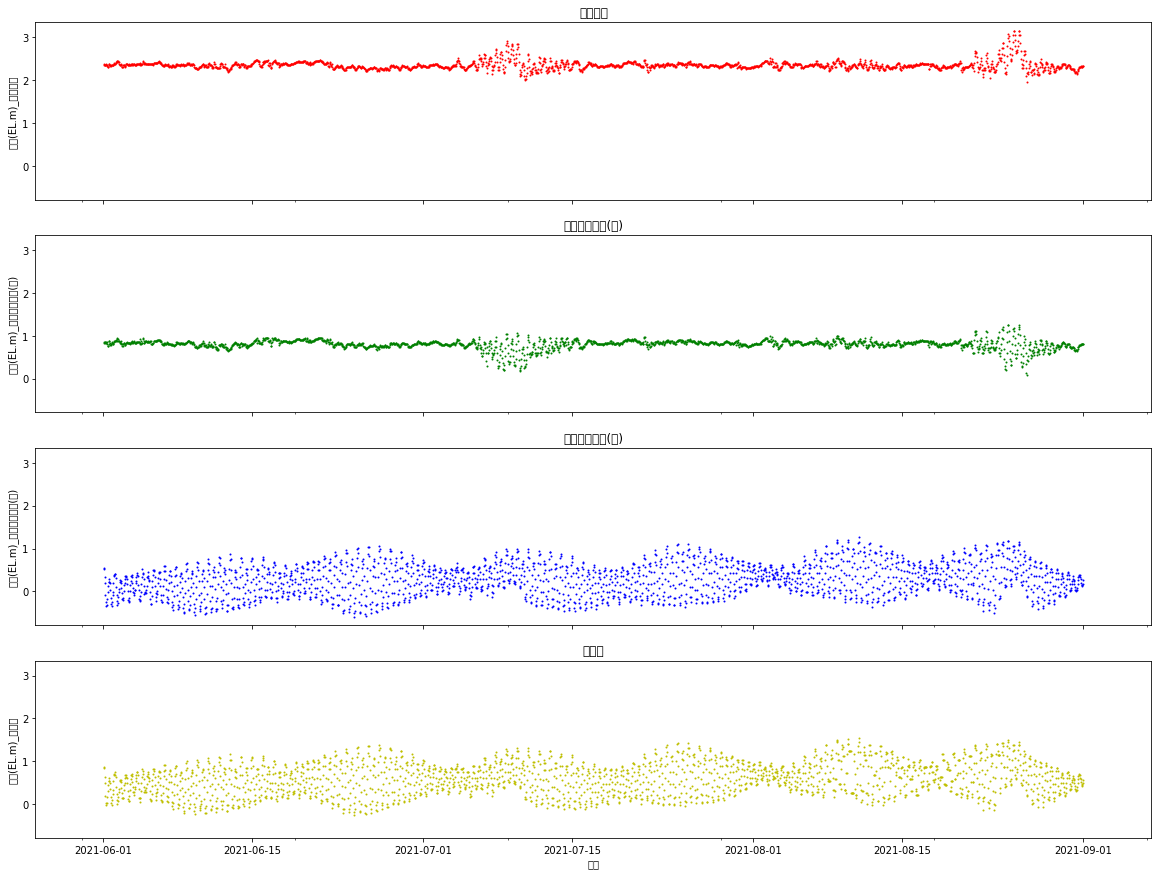

In [215]:
from matplotlib import pyplot as plt
import numpy as np

df_nakdong['로그'] = pd.to_datetime(df_nakdong['로그일자'].apply(str)+' '+df_nakdong['로그시간'].apply(str))
df_nakdong["수위(EL.m)_구포대교"] = df_nakdong["수위(EL.m)_구포대교"].astype(float)
df_nakdong["수위(EL.m)_낙동강하구언(내)"] = df_nakdong["수위(EL.m)_낙동강하구언(내)"].astype(float)
df_nakdong["수위(EL.m)_낙동강하구언(외)"] = df_nakdong["수위(EL.m)_낙동강하구언(외)"].astype(float)
df_nakdong["수위(EL.m)_신평동"] = df_nakdong["수위(EL.m)_신평동"].astype(float)

plt.rcParams["figure.figsize"] = (20,15)
   

fig, axes = plt.subplots(nrows=4, ncols=1, sharex=True, sharey=True)
ax1, ax2, ax3, ax4 = axes.flatten()

df_nakdong.plot(ax=ax1, kind='scatter', x='로그', y="수위(EL.m)_구포대교", color='r', s=1)
ax1.set_title('구포대교')

df_nakdong.plot(ax=ax2, kind='scatter', x='로그', y="수위(EL.m)_낙동강하구언(내)", color='g', s=1)
ax2.set_title('낙동강하구언(내)')

df_nakdong.plot(ax=ax3, kind='scatter', x='로그', y="수위(EL.m)_낙동강하구언(외)", color='b', s=1)
ax3.set_title('낙동강하구언(외)')

df_nakdong.plot(ax=ax4, kind='scatter', x='로그', y="수위(EL.m)_신평동", color='y', s=1)
ax4.set_title('신평동')




# 낙동강 강수량
### 데이터 없음

In [221]:
import requests
import xmltodict
import pandas as pd

startdt = '20210601'
enddt = '20210831'

obscd = 2022680 # 부산시(구포대교)

u = f'http://www.wamis.go.kr:8080/wamis/openapi/wkw/rf_hrdata?obscd={obscd}&startdt={startdt}&enddt={enddt}&output=xml&key={api_key}'
r = requests.get(u)
x = xmltodict.parse(r.content)
x


OrderedDict([('wamis',
              OrderedDict([('count', '0'),
                           ('result',
                            OrderedDict([('code', 'success'),
                                         ('msg', '해당 데이터가 없습니다.')]))]))])

In [224]:
obscd = 2022696 # 부산시(낙동강하구언(내))
r = requests.get(u)
x = xmltodict.parse(r.content)
x

OrderedDict([('wamis',
              OrderedDict([('count', '0'),
                           ('result',
                            OrderedDict([('code', 'success'),
                                         ('msg', '해당 데이터가 없습니다.')]))]))])

In [225]:
obscd = 2022697 # 부산시(낙동강하구언(외))
r = requests.get(u)
x = xmltodict.parse(r.content)
x

OrderedDict([('wamis',
              OrderedDict([('count', '0'),
                           ('result',
                            OrderedDict([('code', 'success'),
                                         ('msg', '해당 데이터가 없습니다.')]))]))])

In [226]:
obscd = 2302695 # 부산시(회야/수영, 신평동)
r = requests.get(u)
x = xmltodict.parse(r.content)
x

OrderedDict([('wamis',
              OrderedDict([('count', '0'),
                           ('result',
                            OrderedDict([('code', 'success'),
                                         ('msg', '해당 데이터가 없습니다.')]))]))])

# 회야, 수영 (기온, 습도, 풍속, 풍향)
### 데이터 없음

In [227]:
obscd = 2302695 # 부산시(회야/수영, 신평동)
urll = f'http://www.wamis.go.kr:8080/wamis/openapi/wkw/we_hrdata?obscd={obscd}&startdt={startdt}&enddt={enddt}&output=xml&key={api_key}'
responsee = requests.get(urll)
ee = xmltodict.parse(responsee.content)

ee


OrderedDict([('wamis',
              OrderedDict([('count', '0'),
                           ('result',
                            OrderedDict([('code', 'success'),
                                         ('msg', '해당 데이터가 없습니다.')]))]))])

# 을숙도?
### 을숙도 관측소 존재 x

# 기상청 API
## 날씨 예보
### Variable 설명 참조: http://www.kma.go.kr/images/weather/lifenindustry/timeseries_XML.pdf

In [337]:
# 부산시 동래구 온천제2,3동
x = 98
y = 76
url_2 = f'https://www.kma.go.kr/wid/queryDFS.jsp?gridx={x}&gridy={y}'
response_2 = requests.get(url_2)
ddd = xmltodict.parse(response_2.content)

tmp = pd.DataFrame.from_dict(ddd['wid']['body']['data'])
tmp.columns = ['sequence', 'hour', 'day', '현재시간온도', '최고온도', '최저온도','하늘상태코드','강수상태코드','날씨한국어','날씨영어','강수확률%','12시간 예상강수량','12시간 예상적설량','풍속(m/s)','풍향','풍향한국어','풍향영어','습도%','6시간 예상강수량','6시간 예상적설량']
tmp.to_csv('기상청_부산시동래구온천제23동.csv', encoding='utf-8', index=False)
tmp

,sequence,hour,day,현재시간온도,최고온도,최저온도,하늘상태코드,강수상태코드,날씨한국어,날씨영어,강수확률%,12시간 예상강수량,12시간 예상적설량,풍속(m/s),풍향,풍향한국어,풍향영어,습도%,6시간 예상강수량,6시간 예상적설량
0,0,18,0,24.0,-999.0,-999.0,1,0,맑음,Clear,0,0.0,0.0,3.7,1,북동,NE,60,0.0,0.0
1,1,21,0,22.0,-999.0,-999.0,1,0,맑음,Clear,0,0.0,0.0,3.3000000000000003,1,북동,NE,65,0.0,0.0
2,2,24,0,21.0,-999.0,-999.0,4,0,흐림,Cloudy,30,0.0,0.0,3.2,1,북동,NE,70,0.0,0.0
3,3,3,1,21.0,28.0,21.0,4,0,흐림,Cloudy,30,0.0,0.0,3.2,1,북동,NE,75,0.0,0.0
4,4,6,1,21.0,28.0,21.0,4,0,흐림,Cloudy,30,0.0,0.0,2.7,1,북동,NE,75,0.0,0.0
5,5,9,1,24.0,28.0,21.0,4,0,흐림,Cloudy,30,0.0,0.0,3.8000000000000003,2,동,E,65,0.0,0.0
6,6,12,1,26.0,28.0,21.0,4,0,흐림,Cloudy,30,0.0,0.0,3.3000000000000003,2,동,E,60,0.0,0.0
7,7,15,1,26.0,28.0,21.0,4,0,흐림,Cloudy,30,0.0,0.0,3.2,2,동,E,60,0.0,0.0
8,8,18,1,24.0,28.0,21.0,4,0,흐림,Cloudy,30,0.0,0.0,3.4000000000000004,1,북동,NE,70,0.0,0.0
9,9,21,1,23.0,28.0,21.0,4,0,흐림,Cloudy,30,0.0,0.0,3.1,1,북동,NE,75,0.0,0.0


In [ ]:
# 부산시 동래구 온천제1동
x = 98
y = 77
url_3 = f'https://www.kma.go.kr/wid/queryDFS.jsp?gridx={x}&gridy={y}'
response_3 = requests.get(url_3)
dddd = xmltodict.parse(response_3.content)

tmp1 = pd.DataFrame.from_dict(dddd['wid']['body']['data'])
tmp1.columns = ['sequence', 'hour', 'day', '현재시간온도', '최고온도', '최저온도','하늘상태코드','강수상태코드','날씨한국어','날씨영어','강수확률%','12시간 예상강수량','12시간 예상적설량','풍속(m/s)','풍향','풍향한국어','풍향영어','습도%','6시간 예상강수량','6시간 예상적설량']
tmp1.to_csv('기상청_부산시동래구온천제1동.csv', encoding='utf-8', index=False)
tmp1

# 기상청_지상(종관, ASOS) 시간자료 조회서비스
### https://www.data.go.kr/tcs/dss/selectApiDataDetailView.do?publicDataPk=15057210

In [391]:
import requests

busan = pd.DataFrame(columns= ['로그일자', '로그시간' ,'기온','강수량','풍속','풍향','습도','중기압','이슬점온도','현지기압','해면 기압','일조','일사', '적설', '3시간 신적설', '전운량', '중하층운량', '운형', '최저운고', '시정', '지면상태','지면온도','5cm 지중온도', '10cm 지중온도', '20cm 지중온도', '30cm 지중온도'])
url = 'http://apis.data.go.kr/1360000/AsosHourlyInfoService/getWthrDataList'


for pagenum in range(1,4):
    
    params ={'serviceKey' : 'ohTXGeeQjkYMKLwEMSlVmK6k7T82fxzY/6OBMd2pJIO072lfTLFtUrDViq9/DuB5UHBWu9VWG9Fq3TPNvZ743g==', 
         'pageNo' : pagenum, 
         'numOfRows' : '999', 
         'dataType' : 'XML', 
         'dataCd' : 'ASOS', 
         'dateCd' : 'HR', 
         'startDt' : '20210601', 
         'startHh' : '01', 
         'endDt' : '20210831', 
         'endHh' : '23', 
         'stnIds' : '159'}
    
    response = requests.get(url, params=params)
    
    daily_dic = xmltodict.parse(response.content)

    tmp = pd.DataFrame.from_dict(daily_dic['response']['body']['items']['item'])

    tmp.columns = ['시간', '목록순서', '지점번호', '지점이름', '기온', '기온 품질검사 플래그','강수량','강수량 품질검사 플래그','풍속','풍속 품질검사 플래스','풍향','풍향 품질검사 플래그','습도','습도 품질검사 플래그','중기압','이슬점온도','현지기압','현지기압 품질검사 플래그','해면 기압','해면기압 품질검사 플래그', '일조', '일조 품질검사 플래그', '일사', '적설', '3시간 신적설', '전운량', '중하층운량', '운형', '최저운고', '시정', '지면상태', '현상번호', '지면온도', '지면온도 품질검사 플래그', '5cm 지중온도', '10cm 지중온도', '20cm 지중온도', '30cm 지중온도']
    
    tmp['시간'] = pd.to_datetime(tmp['시간'])
    
    tmp['로그일자'] = [d.date() for d in tmp['시간']]
    tmp['로그시간'] = [d.time() for d in tmp['시간']]
    
    print(tmp)
    
    tmp = tmp[['로그일자', '로그시간' ,'기온','강수량','풍속','풍향','습도','중기압','이슬점온도','현지기압','해면 기압','일조','일사', '적설', '3시간 신적설', '전운량', '중하층운량', '운형', '최저운고', '시정', '지면상태','지면온도','5cm 지중온도', '10cm 지중온도', '20cm 지중온도', '30cm 지중온도']]

    busan = pd.concat([busan,tmp], axis=0)

busan = busan.reset_index(drop=True)
busan
    

                     시간 목록순서 지점번호 지점이름    기온 기온 품질검사 플래그   강수량 강수량 품질검사 플래그  \
0   2021-06-01 01:00:00    1  159   부산  17.4        None  None         None   
1   2021-06-01 02:00:00    2  159   부산  17.2        None  None         None   
2   2021-06-01 03:00:00    3  159   부산  17.1        None  None         None   
3   2021-06-01 04:00:00    4  159   부산  16.7        None  None         None   
4   2021-06-01 05:00:00    5  159   부산  16.6        None  None         None   
..                  ...  ...  ...  ...   ...         ...   ...          ...   
994 2021-07-12 11:00:00  995  159   부산  29.5        None  None         None   
995 2021-07-12 12:00:00  996  159   부산  28.7        None  None         None   
996 2021-07-12 13:00:00  997  159   부산  29.4        None  None         None   
997 2021-07-12 14:00:00  998  159   부산  29.7        None  None         None   
998 2021-07-12 15:00:00  999  159   부산  29.5        None  None         None   

      풍속 풍속 품질검사 플래스  ...  지면상태  현상번호  지면온도 지면온도 품질

,로그일자,로그시간,기온,강수량,풍속,풍향,습도,중기압,이슬점온도,현지기압,...,중하층운량,운형,최저운고,시정,지면상태,지면온도,5cm 지중온도,10cm 지중온도,20cm 지중온도,30cm 지중온도
0,2021-06-01,01:00:00,17.4,None,2.3,50,84,16.6,14.6,1005.3,...,0,None,None,2685,None,18.3,19.7,21.9,22.0,21.5
1,2021-06-01,02:00:00,17.2,None,2.6,50,82,16.0,14.0,1004.5,...,0,None,None,1396,None,17.8,19.2,21.4,21.7,21.4
2,2021-06-01,03:00:00,17.1,None,1.7,50,79,15.4,13.4,1005.2,...,0,None,None,1851,None,17.1,18.8,21.1,21.5,21.3
3,2021-06-01,04:00:00,16.7,None,2.2,50,79,15.0,13.0,1005.3,...,0,None,None,2135,None,16.6,18.3,20.7,21.2,21.2
4,2021-06-01,05:00:00,16.6,None,2.4,50,74,13.9,11.9,1005.9,...,0,None,None,3255,None,16.2,17.9,20.4,21.0,21.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2202,2021-08-31,19:00:00,25.5,None,2.0,70,86,27.9,22.9,1004.9,...,6,None,5,2845,None,28.6,28.6,29.3,28.2,27.2
2203,2021-08-31,20:00:00,25.4,None,1.9,90,87,28.1,23.0,1005.2,...,8,None,4,2519,None,28.0,28.0,28.8,28.1,27.2
2204,2021-08-31,21:00:00,25.4,None,1.9,90,87,28.1,23.0,1005.5,...,7,ScCi,5,2479,None,27.6,27.5,28.5,27.9,27.2
2205,2021-08-31,22:00:00,25.1,None,0.4,0,88,27.9,22.9,1005.4,...,8,None,4,2362,None,27.2,27.1,28.1,27.8,27.2


In [394]:
rows = []
for i in range(2207):
    for j in range(60):
        dic = {}
        dic['로그일자'] = busan.at[i, '로그일자']
        dic['로그시간'] = busan.at[i, '로그시간']
        dic['로그분'] = (datetime.datetime(2020,1,1,0,0,0) + datetime.timedelta(minutes=j)).time()
        rows.append(dic)

f = pd.DataFrame(rows)

new_dat = pd.merge(left = busan , right = f, on = ["로그일자","로그시간"], how = "outer")

new_dat['로그시간'] = [int(row.strftime('%H')) for row in new_dat['로그시간']]
new_dat['로그분'] = [int(row.strftime('%M')) for row in new_dat['로그분']]
bu = new_dat.rename(columns={'로그시간': 'hour', '로그분': 'min'})
bu = bu[['로그일자', 'hour' ,'min','기온','강수량','풍속','풍향','습도','중기압','이슬점온도','현지기압','해면 기압','일조','일사', '적설', '3시간 신적설', '전운량', '중하층운량', '운형', '최저운고', '시정', '지면상태','지면온도','5cm 지중온도', '10cm 지중온도', '20cm 지중온도', '30cm 지중온도']]
bu

,로그일자,hour,min,기온,강수량,풍속,풍향,습도,중기압,이슬점온도,...,중하층운량,운형,최저운고,시정,지면상태,지면온도,5cm 지중온도,10cm 지중온도,20cm 지중온도,30cm 지중온도
0,2021-06-01,1,0,17.4,None,2.3,50,84,16.6,14.6,...,0,None,None,2685,None,18.3,19.7,21.9,22.0,21.5
1,2021-06-01,1,1,17.4,None,2.3,50,84,16.6,14.6,...,0,None,None,2685,None,18.3,19.7,21.9,22.0,21.5
2,2021-06-01,1,2,17.4,None,2.3,50,84,16.6,14.6,...,0,None,None,2685,None,18.3,19.7,21.9,22.0,21.5
3,2021-06-01,1,3,17.4,None,2.3,50,84,16.6,14.6,...,0,None,None,2685,None,18.3,19.7,21.9,22.0,21.5
4,2021-06-01,1,4,17.4,None,2.3,50,84,16.6,14.6,...,0,None,None,2685,None,18.3,19.7,21.9,22.0,21.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132415,2021-08-31,23,55,25.1,None,1.6,90,88,27.9,22.9,...,9,None,4,2072,None,27.1,26.9,27.9,27.6,27.2
132416,2021-08-31,23,56,25.1,None,1.6,90,88,27.9,22.9,...,9,None,4,2072,None,27.1,26.9,27.9,27.6,27.2
132417,2021-08-31,23,57,25.1,None,1.6,90,88,27.9,22.9,...,9,None,4,2072,None,27.1,26.9,27.9,27.6,27.2
132418,2021-08-31,23,58,25.1,None,1.6,90,88,27.9,22.9,...,9,None,4,2072,None,27.1,26.9,27.9,27.6,27.2


In [395]:
bu.to_csv('부산_기상청시간자료.csv', encoding='utf-8', index=False)